# Problem Statement

### Telecom Churn Prediction!

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. This case study is to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb_classifier

from imblearn.over_sampling import SMOTE

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Dataset Information

In [3]:
df = pd.read_csv(r'dataset\train.csv')
df_test = pd.read_csv(r'dataset\test.csv')

In [4]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
df.shape

(69999, 172)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [8]:
pd.set_option('display.max_rows', None)
df.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

## Data Preprocessing

### Dtype treatment

In [9]:
df.select_dtypes(include ='object').head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


All the object type columns are actually date. Lets convert those back to date type.

In [10]:
cols = df.select_dtypes(include ='object').columns
for col in cols:
    df[col] = pd.to_datetime(df[col])

In [11]:
df[cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


##### Applying the same for test df

In [12]:
df_test.select_dtypes(include ='object').head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/26/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/19/2014,7/16/2014,8/24/2014,NaN,NaN,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/27/2014,8/28/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/24/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/29/2014,8/30/2014,NaN,NaN,NaN


In [13]:
cols = df_test.select_dtypes(include ='object').columns
for col in cols:
    df_test[col] = pd.to_datetime(df_test[col])

In [14]:
df_test[cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-26,2014-08-24,NaT,NaT,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-06-19,2014-07-16,2014-08-24,NaT,NaT,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-27,2014-08-28,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-30,2014-08-24,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-29,2014-08-30,NaT,NaT,NaT


### Insignificant columns treatment

Let's check the count of the value counts for each column to identify if any column is insignificant.

In [15]:
df.apply(lambda column: column.value_counts().count()).sort_values()

std_ic_t2o_mou_6                1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
std_ic_t2o_mou_8                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
std_ic_t2o_mou_7                1
night_pck_user_6                2
night_pck_user_7                2
night_pck_user_8                2
churn_probability               2
fb_user_7                       2
fb_user_8                       2
fb_user_6                       2
monthly_2g_6                    5
monthly_2g_8                    6
monthly_2g_7                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
sachet_3g_6                    23
count_rech_3g_6                23
sachet_3g_7                    26
count_rech_3g_

It seems that some of the columns not having any significant data. Lets filter out those and remove those columns.

In [15]:
df.apply(lambda column: column.value_counts().count()).sort_values()[df.apply(lambda column: column.value_counts().count()).sort_values() == 1]

std_ic_t2o_mou_6        1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_ic_t2o_mou_8        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_7        1
dtype: int64

In [17]:
cols = df.apply(lambda column: column.value_counts().count()).sort_values()[df.apply(lambda column: column.value_counts().count()).sort_values() == 1].index
cols

Index(['std_ic_t2o_mou_6', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_7'],
      dtype='object')

In [18]:
df = df.drop(columns = cols)
df_test = df_test.drop(columns = cols)

In [19]:
df.shape

(69999, 159)

In [20]:
df_test.shape

(30000, 158)

### NA Treatment

In [21]:
#Null values identification
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

count_rech_2g_6             52431
total_rech_data_6           52431
av_rech_amt_data_6          52431
arpu_3g_6                   52431
max_rech_data_6             52431
arpu_2g_6                   52431
night_pck_user_6            52431
count_rech_3g_6             52431
fb_user_6                   52431
date_of_last_rech_data_6    52431
night_pck_user_7            52134
total_rech_data_7           52134
count_rech_3g_7             52134
date_of_last_rech_data_7    52134
max_rech_data_7             52134
arpu_3g_7                   52134
fb_user_7                   52134
count_rech_2g_7             52134
av_rech_amt_data_7          52134
arpu_2g_7                   52134
date_of_last_rech_data_8    51582
total_rech_data_8           51582
max_rech_data_8             51582
count_rech_2g_8             51582
fb_user_8                   51582
count_rech_3g_8             51582
av_rech_amt_data_8          51582
arpu_2g_8                   51582
arpu_3g_8                   51582
night_pck_user

In [25]:
# columns having higher numbers of NA in terms of % wise
round(((df.isna().sum()[df.isna().sum() > 50000]/len(df))*100), 2).sort_values(ascending=False)

date_of_last_rech_data_6    74.90
count_rech_2g_6             74.90
fb_user_6                   74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
arpu_3g_6                   74.90
count_rech_3g_6             74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
total_rech_data_6           74.90
arpu_3g_7                   74.48
count_rech_2g_7             74.48
fb_user_7                   74.48
count_rech_3g_7             74.48
date_of_last_rech_data_7    74.48
av_rech_amt_data_7          74.48
night_pck_user_7            74.48
max_rech_data_7             74.48
total_rech_data_7           74.48
arpu_2g_7                   74.48
arpu_2g_8                   73.69
date_of_last_rech_data_8    73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
arpu_3g_8                   73.69
total_rech_data_8           73.69
av_rech_amt_data_8          73.69
count_rech_3g_8             73.69
count_rech_2g_8             73.69
fb_user_8     

Let's analyse the above columns and treat them accordingly. 

These below columns are date on which the last recharge done in the month of June, July and August. Many data are missing as the user had not done recharge in the respected months. Lets add 0 in the missing values to represent that recharge has not been done. Before adding 0 to the missing fields lets `derive` new columns containing only the day of the date information and remove the original.

- date_of_last_rech_data_8
- date_of_last_rech_data_7
- date_of_last_rech_data_6
- date_of_last_rech_8
- date_of_last_rech_7
- date_of_last_rech_6

##### Derive new columns

In [22]:
cols = ['date_of_last_rech_data_8', 'date_of_last_rech_data_7', 'date_of_last_rech_data_6', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8']

for col in cols:
    df[col] = pd.DatetimeIndex(df[col]).day
    df[col].fillna(0, inplace = True)
    df[col] = df[col].astype('int')
    
for col in cols:
    df_test[col] = pd.DatetimeIndex(df_test[col]).day
    df_test[col].fillna(0, inplace = True)
    df_test[col] = df_test[col].astype('int')
    

In [23]:
df[cols].head()

,date_of_last_rech_data_8,date_of_last_rech_data_7,date_of_last_rech_data_6,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,0,0,0,22,10,24
1,0,8,0,12,10,26
2,0,0,0,11,22,24
3,0,0,0,15,21,25
4,20,23,25,25,26,30


In [24]:
df_test[cols].head()

,date_of_last_rech_data_8,date_of_last_rech_data_7,date_of_last_rech_data_6,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,0,0,0,21,26,24
1,0,0,0,19,16,24
2,0,0,0,29,27,28
3,0,0,0,25,30,24
4,0,0,0,29,29,30


These below columns represending how much data was recharged per month by user. Most of the columns are NA as recharge was not done. Lets impute NA by 0.

- total_rech_data_8
- total_rech_data_7
- total_rech_data_6
- max_rech_data_8
- max_rech_data_7
- max_rech_data_6

In [25]:
cols = ['total_rech_data_8', 'total_rech_data_7', 'total_rech_data_6', 'max_rech_data_8', 'max_rech_data_7', 'max_rech_data_6']

for col in cols:
    df[col].fillna(0, inplace = True)
    df_test[col].fillna(0, inplace = True)

As we already know that total recharge and max recharge for most of the customers are zero which means they are not using internet service hence the below columns average revenue(2G and 3G), recharge count(2G and 3G), average data recharge amt should also be 0.

- arpu_2g_6
- arpu_2g_7
- arpu_2g_8
- arpu_3g_6
- arpu_3g_7
- arpu_3g_8
- count_rech_2g_6
- count_rech_2g_7
- count_rech_2g_8
- count_rech_3g_6
- count_rech_3g_7
- count_rech_3g_8
- av_rech_amt_data_6
- av_rech_amt_data_7
- av_rech_amt_data_8

In [26]:
cols = ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'count_rech_2g_6', 
        'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
         'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

for col in cols:
    df[col].fillna(0, inplace = True)
    df_test[col].fillna(0, inplace = True)

As per our early assumption, if user is not opting for the internet service than there is an higher chance that the same user will not opt for facebook service. Hence the below columns should also have 0.

- fb_user_6
- fb_user_7
- fb_user_8

In [27]:
cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']

for col in cols:
    df[col].fillna(0, inplace = True)
    df_test[col].fillna(0, inplace = True)

Let's remove the night_pck_user columns as we are not sure about that.

In [28]:
df = df.drop(columns=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'])
df_test = df_test.drop(columns=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'])

Lets analysis the remaining NA values.

In [29]:
#Null values identification
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

ic_others_8         3703
loc_og_t2m_mou_8    3703
std_og_mou_8        3703
spl_og_mou_8        3703
std_og_t2f_mou_8    3703
og_others_8         3703
std_og_t2m_mou_8    3703
loc_ic_t2t_mou_8    3703
std_og_t2t_mou_8    3703
loc_ic_t2m_mou_8    3703
loc_og_mou_8        3703
loc_ic_t2f_mou_8    3703
loc_og_t2c_mou_8    3703
loc_ic_mou_8        3703
isd_og_mou_8        3703
std_ic_t2t_mou_8    3703
loc_og_t2f_mou_8    3703
std_ic_t2m_mou_8    3703
spl_ic_mou_8        3703
onnet_mou_8         3703
loc_og_t2t_mou_8    3703
std_ic_t2f_mou_8    3703
isd_ic_mou_8        3703
roam_og_mou_8       3703
std_ic_mou_8        3703
offnet_mou_8        3703
roam_ic_mou_8       3703
ic_others_6         2768
og_others_6         2768
loc_ic_t2t_mou_6    2768
isd_ic_mou_6        2768
spl_ic_mou_6        2768
loc_ic_t2m_mou_6    2768
std_ic_t2m_mou_6    2768
loc_ic_t2f_mou_6    2768
loc_ic_mou_6        2768
std_ic_mou_6        2768
std_ic_t2t_mou_6    2768
std_ic_t2f_mou_6    2768
spl_og_mou_6        2768


From the above output we can see that all the above columns for the month 8 - 3703, for month 6 - 2768 and for month 7 - 2687 missing values are there. 

In [30]:
print("Churn count in the NA rows : ", df[df.isna().any(axis=1)]['churn_probability'].sum())

Churn count in the NA rows :  3337


`It is very obvious from the above output that most of the rows having NA are the churn cases. So It is purely not by chance.` So replacing the missing values with zero makes sense here too as all these columns represents the incoming and outgoing class.

In [31]:
cols = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False).index.tolist()

for col in cols:
    df[col].fillna(0, inplace = True)
    df_test[col].fillna(0, inplace = True)

In [32]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [33]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Series([], dtype: int64)

All the missing values are treated accordingly.

### outlier Treatment

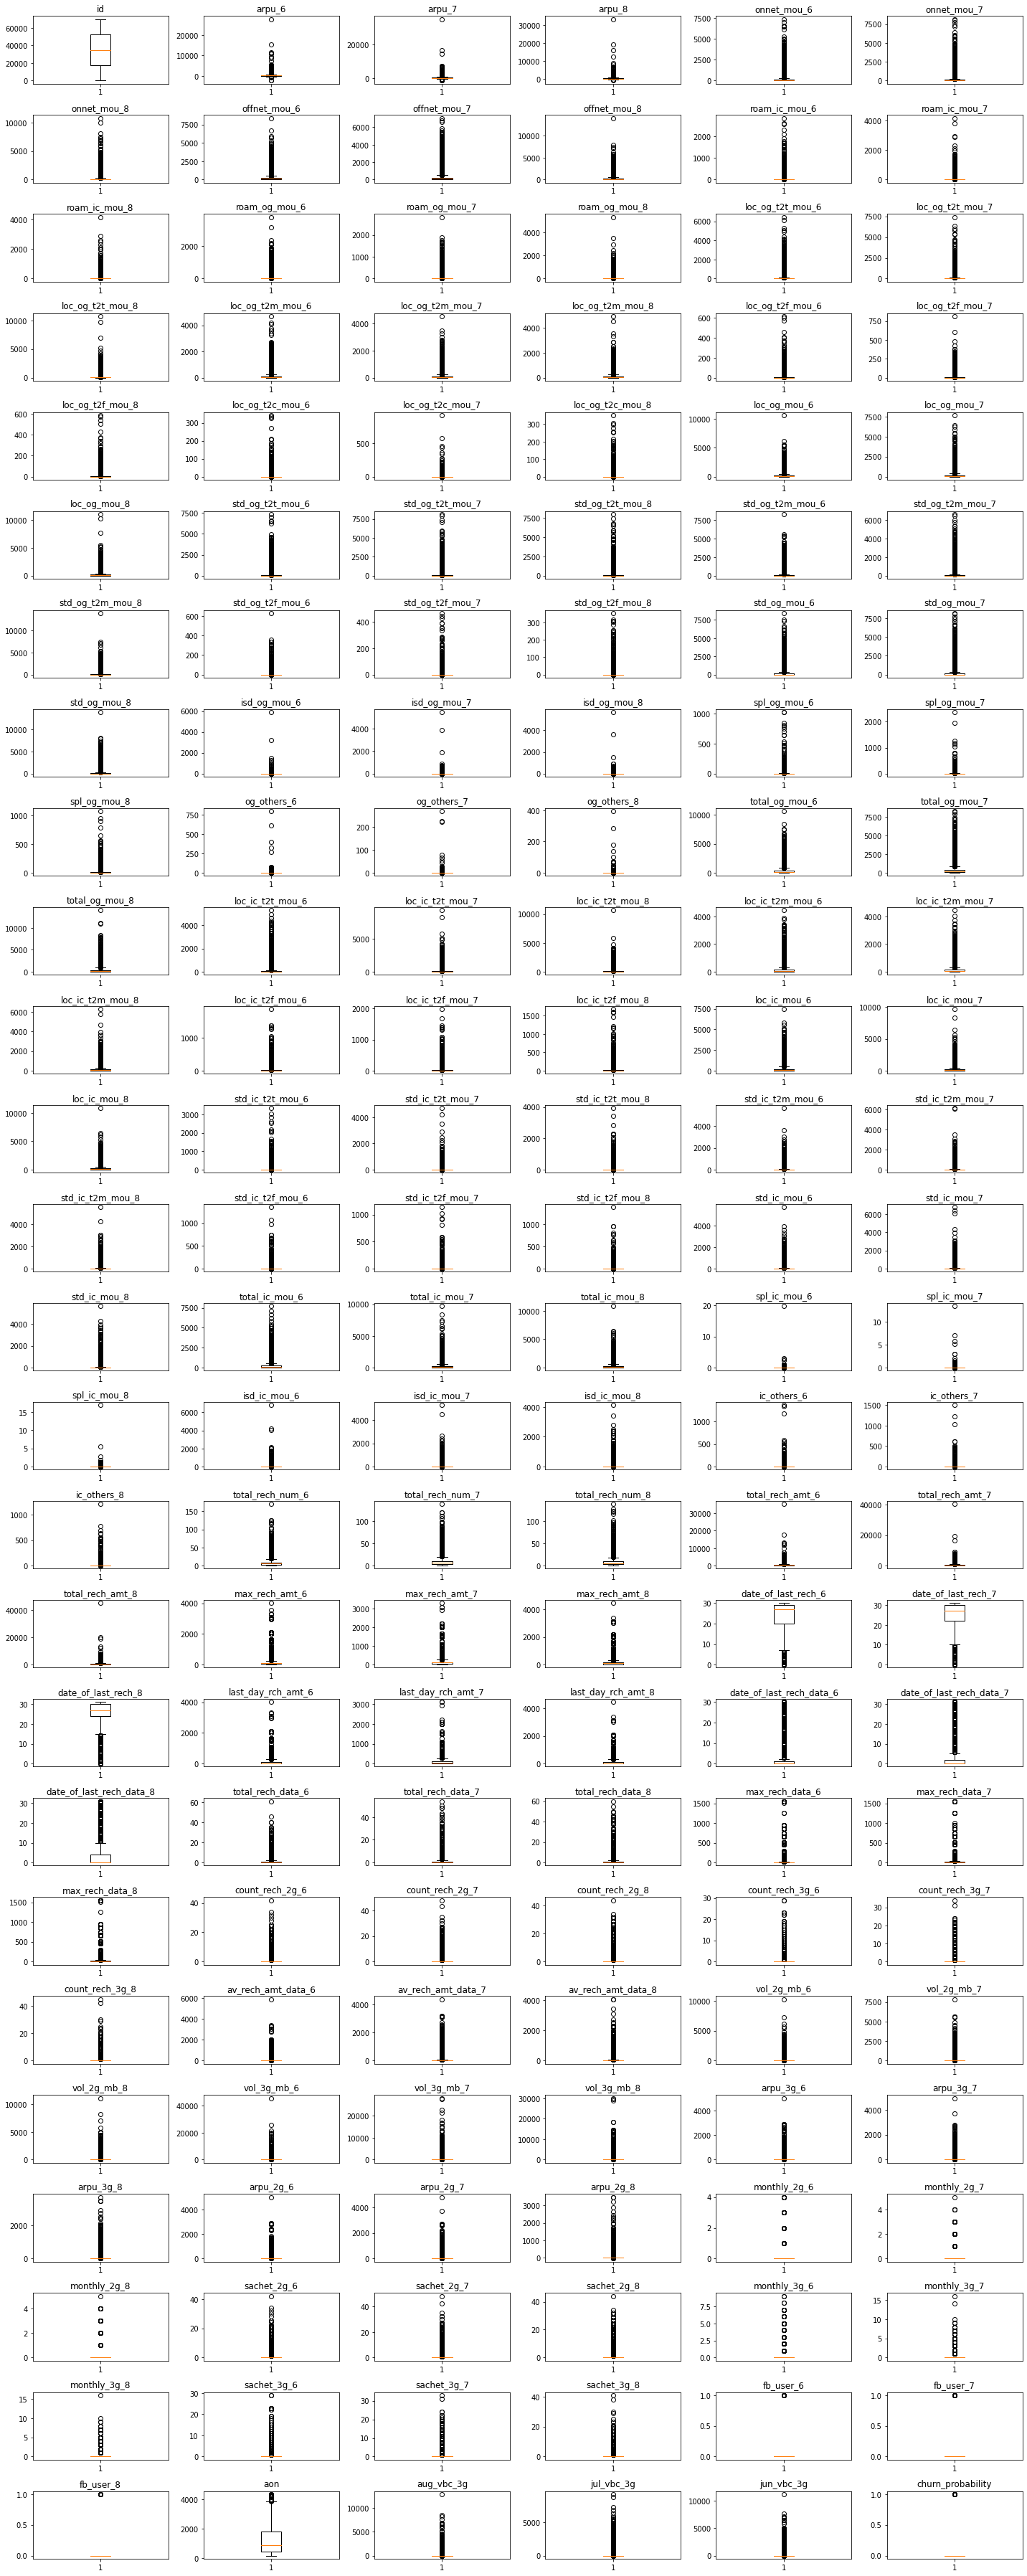

In [34]:
import math

n_cols = 6
n_rows = math.ceil(len(df.columns)/n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,50))
count = 0

for i in range(n_rows):
    for j in range(n_cols):
        if count == len(df.columns):
            break
        else:
            axs[i][j].boxplot(df.iloc[:, count])
            axs[i][j].set_title(df.columns[count])
            count += 1
plt.tight_layout()
plt.show()

In [35]:
df.describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,...,0.081444,0.085487,0.229975,0.232132,0.234246,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,...,0.634547,0.680035,0.420819,0.422196,0.423530,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
1%,699.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.00000,0.000000
5%,3499.900000,1.500000,0.919000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,0.000000,0.00000,0.000000
10%,6999.800000,32.248600,29.761200,18.210600,0.000000,0.000000,0.000000,2.030000,1.800000,0.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,286.000000,0.000000,0.000000,0.00000,0.000000
20%,13999.600000,74.710600,69.075600,64.199200,2.680000,2.380000,1.680000,19.030000,17.680000,14.622000,...,0.000000,0.000000,0.000000,0.000000,0.000000,401.000000,0.000000,0.000000,0.00000,0.000000
30%,20999.400000,113.017600,105.396400,105.203800,8.810000,8.054000,7.130000,39.130000,36.198000,33.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,499.000000,0.000000,0.000000,0.00000,0.000000
40%,27999.200000,151.937400,145.091200,145.545200,17.840000,16.464000,15.680000,61.460000,57.960000,55.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,669.000000,0.000000,0.000000,0.00000,0.000000


we have some outliers but not very much, they may be an high value customers. So lets not drop any rows. Let the feauture engineering techniques like Scaling, Hyperparemeter tuning handle those. Also tree models are not going to suffer from the outliers and we can use lasso and ridge for logistic regression.

## Exploratory Data Analysis

In [36]:
df.head(3)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0


##### Lets create a new dataframe and alter some of the columns for EDA purpose.

In [37]:
df_eda = df.copy()

Let's convert the churn probability column to categorical for ease visuvalization.

In [38]:
df_eda['churn_probability'] = df_eda['churn_probability'].map({0 : 'Non-Churn', 1 : 'Churn'})

#### Churn Rate

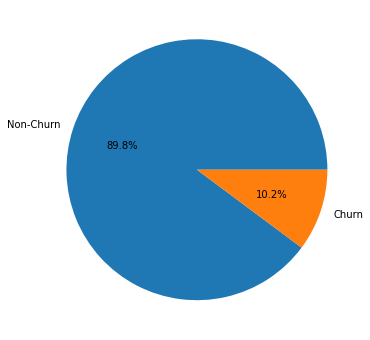

In [39]:
plt.figure(figsize=(8,6))
plt.pie(df_eda['churn_probability'].value_counts(), labels=['Non-Churn', 'Churn'], autopct="%1.1f%%")
plt.show()

We have around 10% of the data as churn and remaining are non-churn cases.

### Average revenue

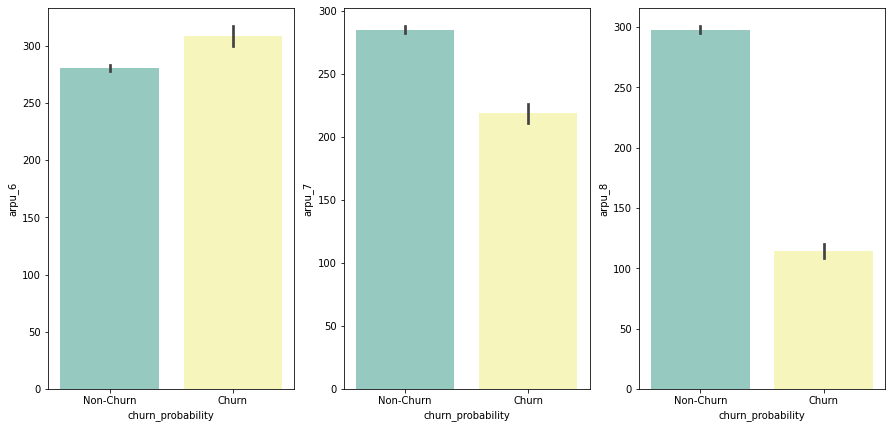

In [40]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

sns.barplot(data=df_eda, x='churn_probability', y='arpu_6', palette='Set3', order=["Non-Churn", "Churn"], ax=ax1)
sns.barplot(data=df_eda, x='churn_probability', y='arpu_7', palette='Set3', order=["Non-Churn", "Churn"], ax=ax2)
sns.barplot(data=df_eda, x='churn_probability', y='arpu_8', palette='Set3', order=["Non-Churn", "Churn"], ax=ax3)

plt.show()

From the above plot, It is quite obvious that average revenue from the churn customers are decreasing heavily each month.

### Recharge amount

In [41]:
col_recharge = []

for col in df_eda.columns:
    if not col.find('rech') == -1:
        col_recharge.append(col)

In [42]:
np.reshape(col_recharge, [1,-1])

array([['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
        'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'date_of_last_rech_6', 'date_of_last_rech_7',
        'date_of_last_rech_8', 'date_of_last_rech_data_6',
        'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
        'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
        'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
        'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']],
      dtype='<U24')

In [43]:
df_recharge = df_eda[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                      'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                      'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                      'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                      'churn_probability']]

In [44]:
df_recharge.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,churn_probability
0,77,65,10,65,65,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Churn
1,0,145,50,0,145,50,0.0,145.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Non-Churn
2,70,120,0,70,70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Churn
3,160,240,130,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Churn
4,290,136,122,50,41,30,175.0,191.0,142.0,7.0,7.0,6.0,0.0,1.0,0.0,Non-Churn


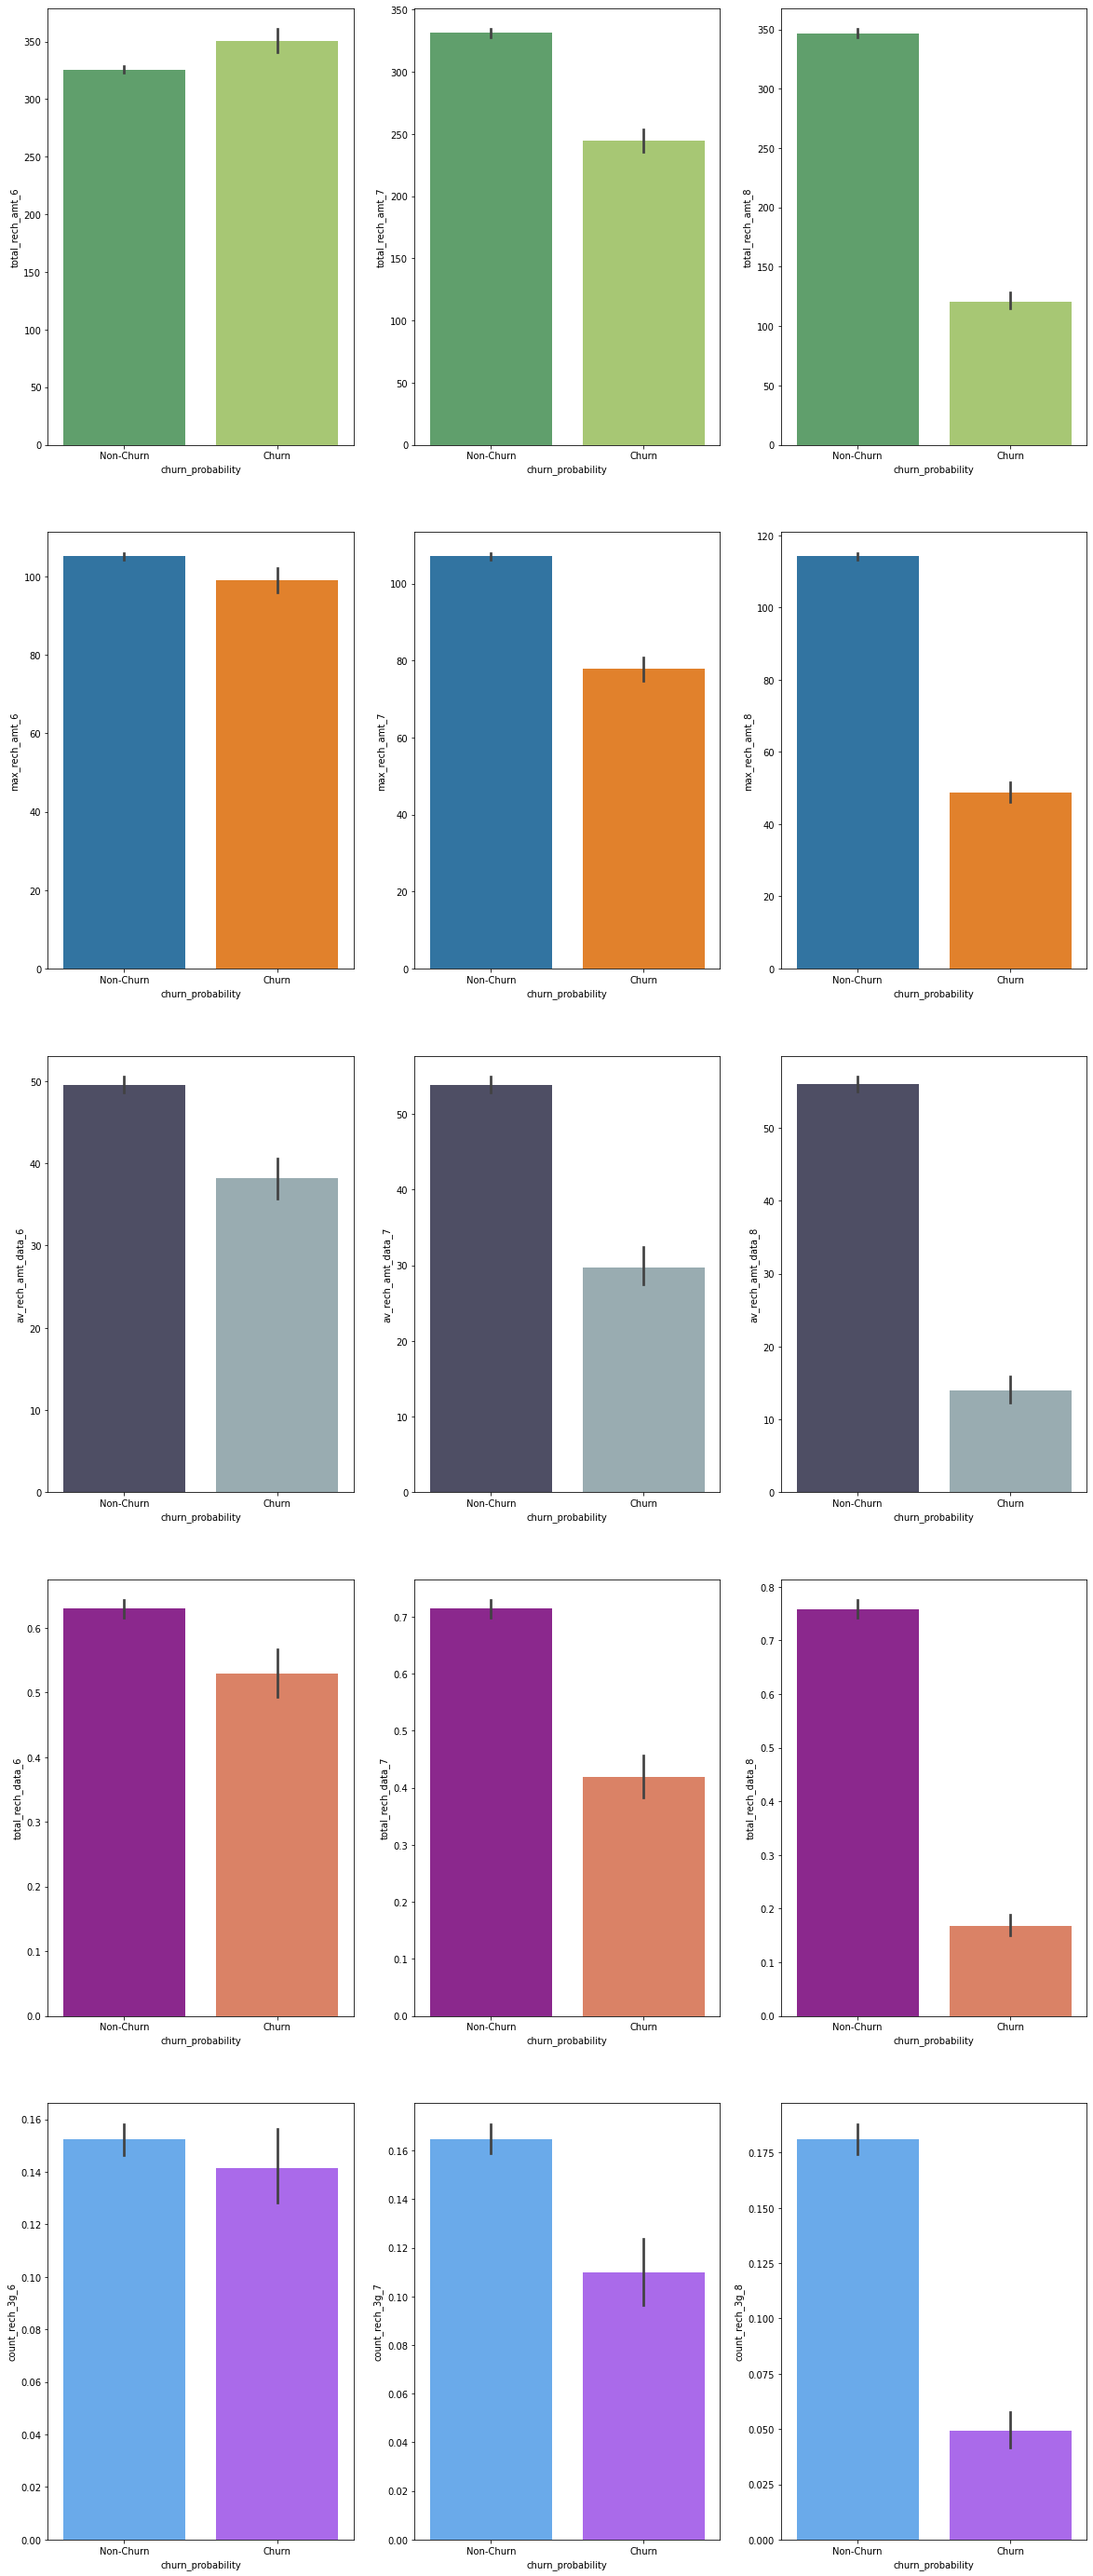

In [45]:
n_rows = 5
n_cols = 3

palette = ['summer', 'tab10', 'bone', 'plasma', 'cool']

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,50))
count = 0

for i in range(n_rows):
    for j in range(n_cols):
        if count == len(df_recharge.columns):
            break
        else:
            sns.barplot(data=df_recharge, x='churn_probability', y=df_recharge.iloc[:, count], palette=palette[i], order=["Non-Churn", "Churn"], ax=axs[i][j])
            #axs[i][j].set_title(df_recharge.columns[count])
            count += 1

From the above plots we can clearly see that for the churn customers their money spend on the telecom service is reduced heavyly each month whereas incase of the non-churn customers its quite stable.

### Incoming vs Outgoing

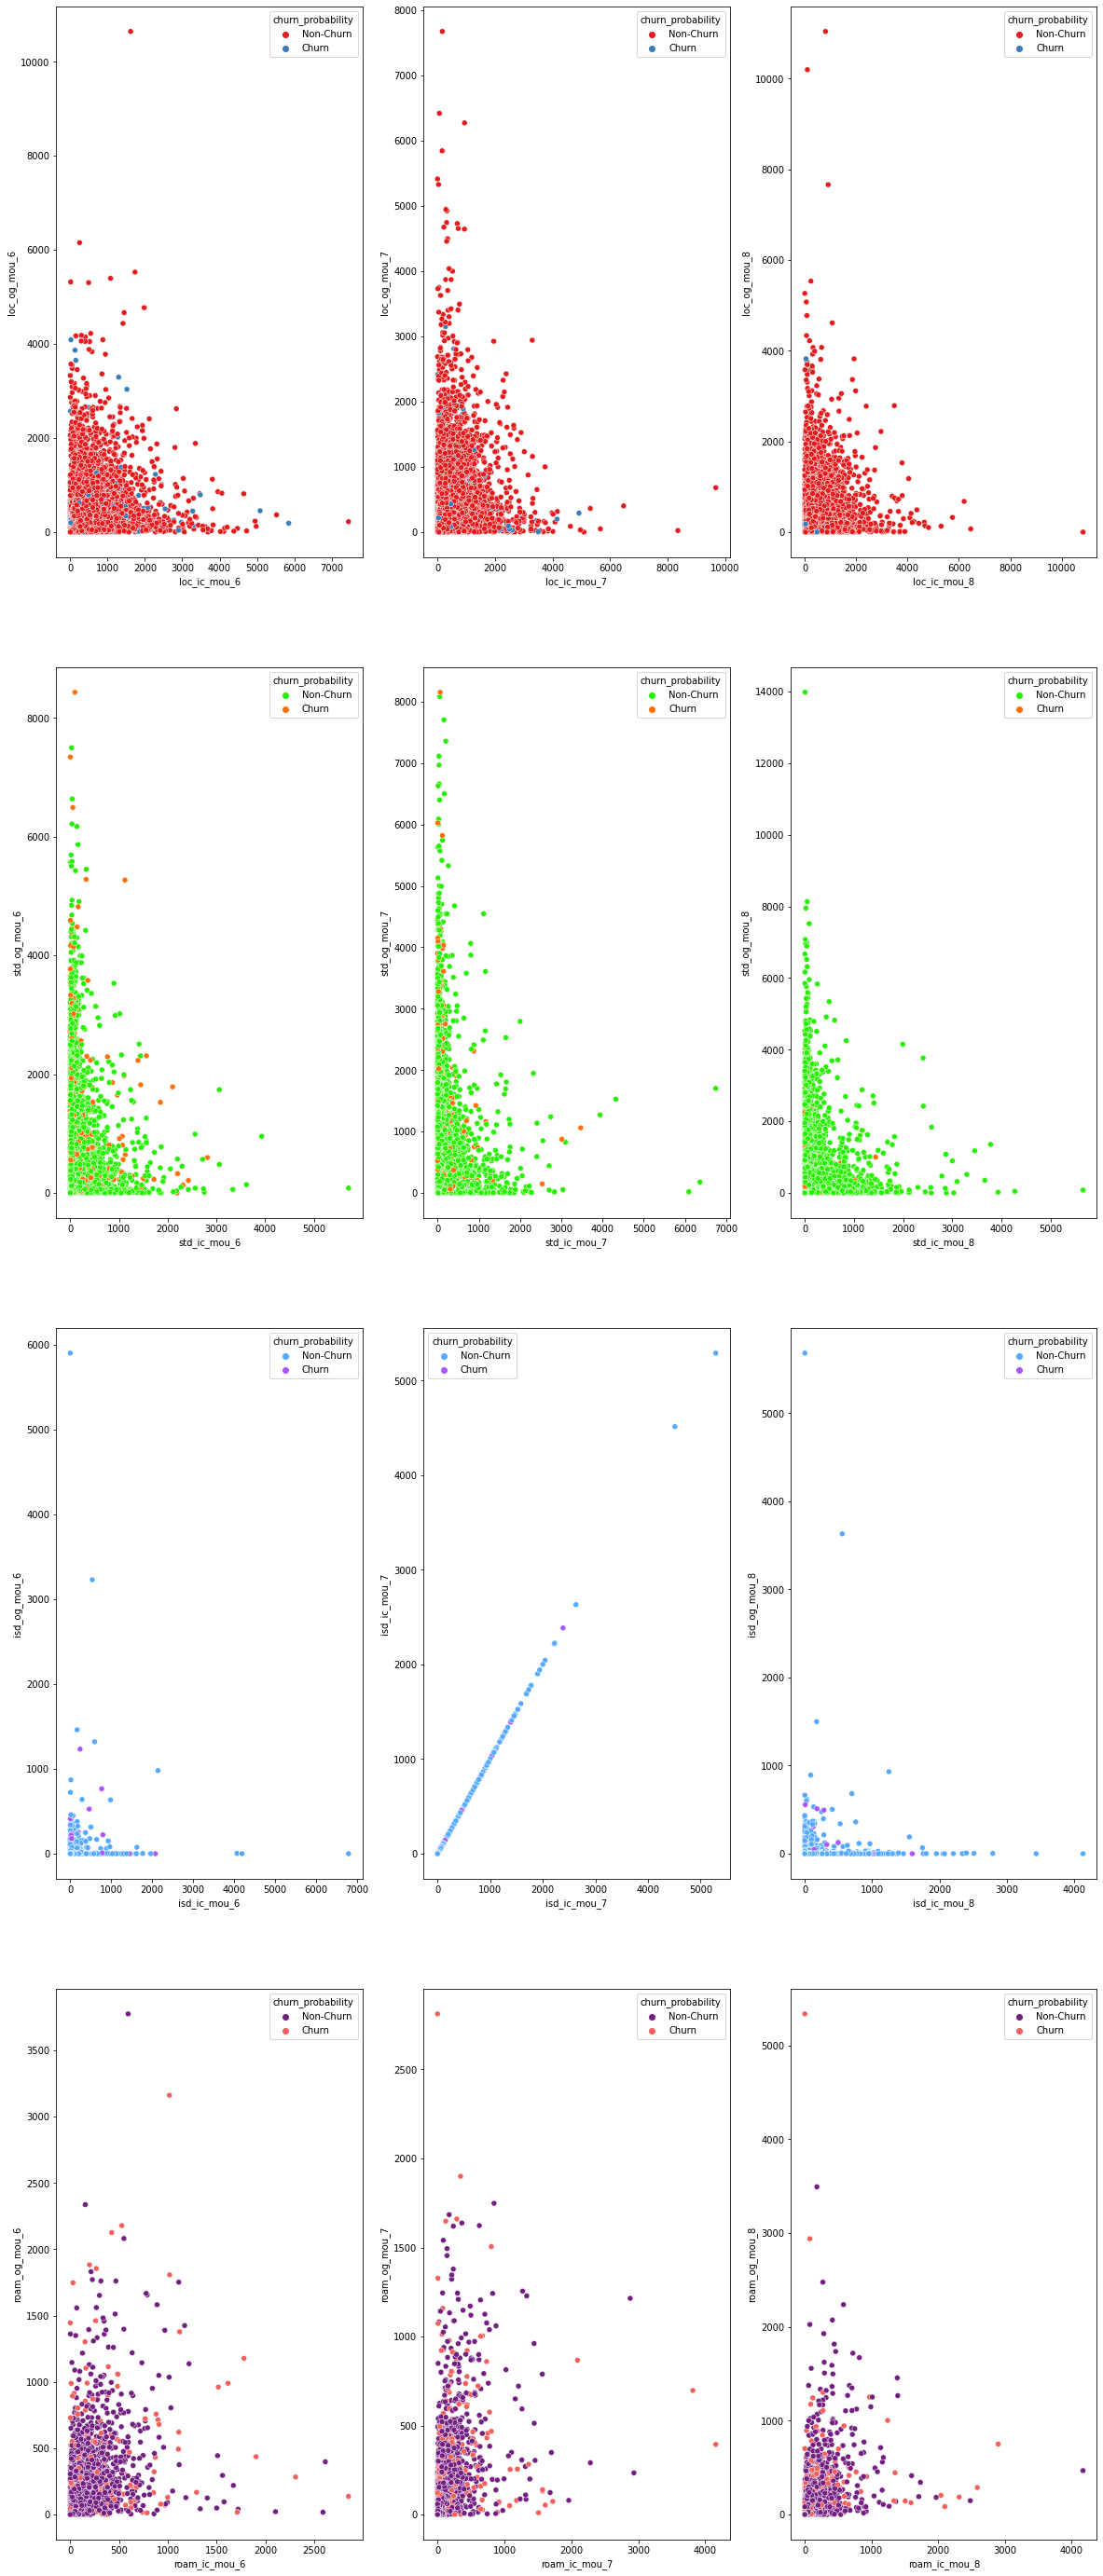

In [46]:
incoming = ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7' , 'std_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']
outgoing = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7' , 'std_og_mou_8', 'isd_og_mou_6', 'isd_ic_mou_7', 'isd_og_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']

n_rows = 4
n_cols = 3
plots_count = 12

palette = ['Set1','gist_ncar','cool','magma']

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,50))
count = 0

for i in range(n_rows):
    for j in range(n_cols):
        if count == plots_count:
            break
        else:
            sns.scatterplot(data=df_eda, x=incoming[count], y=outgoing[count], hue='churn_probability', palette=palette[i], ax=axs[i][j])
            count += 1

It seems that in terms of incomming and outgoing, we can't see much insight to differentiate the churn and non-churn cases. But still we can see the difference in the churn density from 6th month to the 8th month that means the customers who are going to churn is reducing their usage.

### Customer Age vs Churn

<AxesSubplot:xlabel='aon', ylabel='Density'>

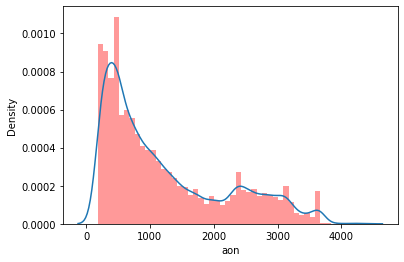

In [47]:
sns.distplot(df_eda['aon'].astype('int'), hist_kws={'color':'red', 'lw':5})

Lets create a new column with 3 buckets of 'aon' column

In [48]:
def aon(element):
    if (element >= df_eda['aon'].quantile(0)) & (element < df_eda['aon'].quantile(0.3)):
        return 'new customers'
    elif (element >= df_eda['aon'].quantile(0.3)) & (element < df_eda['aon'].quantile(0.6)):
        return 'aging customers'
    elif (element >= df_eda['aon'].quantile(0.6)):
        return 'old customers'

In [49]:
df_eda['aon_new'] = df_eda['aon'].apply(aon)

In [50]:
df_eda['aon_new'].head()

0      old customers
1    aging customers
2    aging customers
3    aging customers
4    aging customers
Name: aon_new, dtype: object

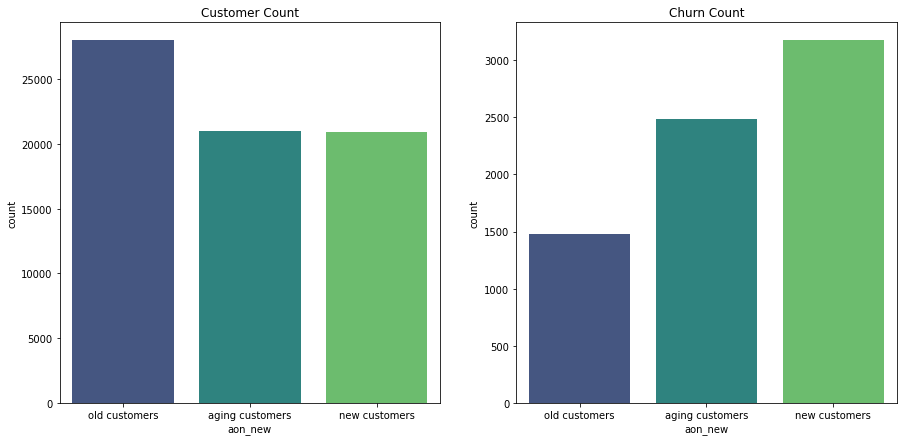

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

sns.countplot(x='aon_new', data=df_eda, palette='viridis', ax=ax1).set(title='Customer Count')

sns.countplot(x=df_eda.loc[(df_eda['churn_probability']=='Churn'), ['aon_new']]['aon_new'], 
              data=df_eda.loc[(df_eda['churn_probability']=='Churn'), ['aon_new']], 
              order=['old customers', 'aging customers', 'new customers'], palette='viridis', ax=ax2).set(title='Churn Count')
plt.show()

In [52]:
print('New customers are those who are below ', df_eda['aon'].quantile(0.3), 'days')
print('Aging customers are those who above ', df_eda['aon'].quantile(0.3), 'days and below ', df_eda['aon'].quantile(0.6), 'days')
print('Old customers are those who are above ', df_eda['aon'].quantile(0.6), 'days')

New customers are those who are below  499.0 days
Aging customers are those who above  499.0 days and below  1126.0 days
Old customers are those who are above  1126.0 days


Customer count based on the age is `Old > Aging > New` whereas churn rate for the customers based on age is `New > Aging > Old`. So mostly the new customers are churning highly.

### Total Recharge and Customer age vs Churn

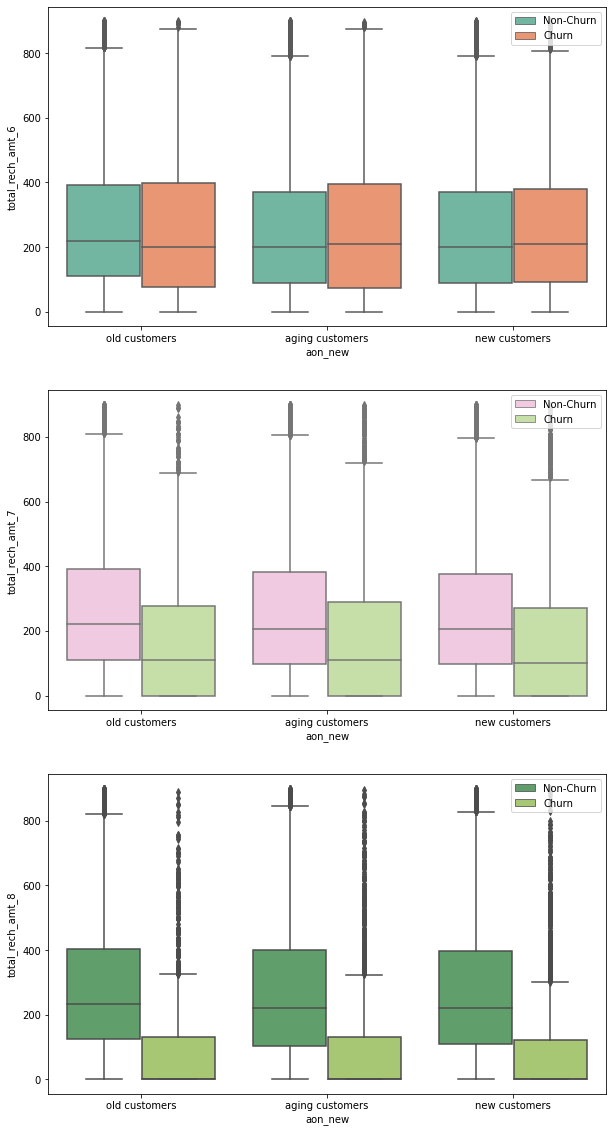

In [53]:
total_recharge = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

n_rows = 3
n_cols = 1
plots_count = n_rows*n_cols

palette = ['Set2','PiYG', 'summer']

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))
count = 0

for i in range(n_cols):
    for j in range(n_rows):
        if count == plots_count:
            break
        else:
            sns.boxplot(data=df_eda, x='aon_new', y=df_eda[(df_eda[total_recharge[count]] < 900)][total_recharge[count]], hue='churn_probability', palette=palette[j], ax=axs[j])
            count += 1
            axs[j].legend(loc='upper right')
plt.show()

Just like we seen earlier, the same pattern of churning continues for even old and new customers as well. Total recharge is heavyly decreased each month.

### Average revenue and fb_user vs Churn

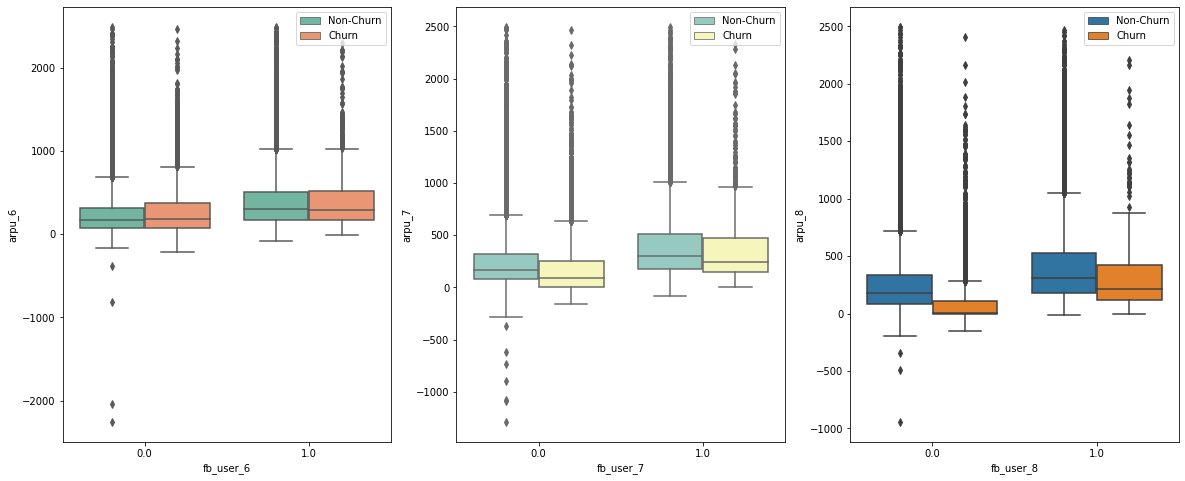

In [54]:
avg_revenue = ['arpu_6', 'arpu_7', 'arpu_8']
fb_user = ['fb_user_6', 'fb_user_7', 'fb_user_8']

n_rows = 1
n_cols = 3
plots_count = n_rows*n_cols

palette = ['Set2','Set3', 'tab10']

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 8))
count = 0

for i in range(n_rows):
    for j in range(n_cols):
        if count == plots_count:
            break
        else:
            sns.boxplot(data=df_eda, x=fb_user[count], y=df_eda[(df_eda[avg_revenue[count]] < 2500)][avg_revenue[count]], hue='churn_probability', palette=palette[j], ax=axs[j])
            #sns.swarmplot(data=df_eda, x=fb_user[count], y=df_eda[(df_eda[avg_revenue[count]] < 2500)][avg_revenue[count]], hue='churn_probability', palette=palette[j], ax=axs[j])
            count += 1
            axs[j].legend(loc='upper right')
plt.show()

Comparitively fb_users churn rate is lesser than the non fb users.

## Data Processing for Model Building

In [55]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Test Train Split

In [56]:
#df_train, df_test_train = train_test_split(df, test_size=0.3, random_state=42, stratify=df['churn_probability'])

In [57]:
#print(df_train.shape, df_test_train.shape)

In [58]:
#print("Churn Rate for Train set: ", round(df_train['churn_probability'].sum()/len(df_train)*100, 2))

In [59]:
#print("Churn Rate for Test set: ",round(df_test_train['churn_probability'].sum()/len(df_test_train)*100, 2))

### Scaling

In [60]:
#X = df_train.drop(columns='id')
#y = df_test_train.drop(columns='id')

In [61]:
#y_train = X.pop('churn_probability')
#X_train = X

#y_test = y.pop('churn_probability')
#X_test = y

In [62]:
#scaler = StandardScaler()
#X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
#X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [63]:
#X_train.head()

In [64]:
#X_test.head()

### Scaling

In [65]:
X = df.drop(columns='id')

y_train = X.pop('churn_probability')
X_train = X

In [66]:
X_test = df_test.drop(columns='id')

In [67]:
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [68]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [69]:
X_train.shape

(69999, 154)

In [70]:
X_test.shape

(30000, 154)

### Logistic Regression

### SK Learn 

In [71]:
#y_train_re = y_train.values.reshape(-1, 1)

In [72]:
#y_train_re.shape

In [73]:
#lr_model = LogisticRegression()

#lr_model.fit(X_train, y_train_re)

In [74]:
#y_train_pred_prob = lr_model.predict_proba(X_train)
#y_train_pred_prob = np.around(y_train_pred_prob, 2)
#y_train_pred_prob = y_train_pred_prob[:, 1]

In [75]:
#df_y_train = pd.DataFrame({'customer id': df_train['id'], 'churn_proba': y_train_pred_prob, 'churn': y_train})

In [76]:
#df_y_train.head()

### Statsmodel

#### Lets build the base model with logistic regression with statsmodel for statistical analysis

In [77]:
lr_model_sm = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69853
Model Family:                Binomial   Df Model:                          145
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 11 May 2022   Deviance:                   6.5246e+05
Time:                        09:31:51   Pearson chi2:                 3.19e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.209e+15   2.54e+05  -4.76e+09      0.000   -1.21e+15   -1.21e+15
arpu_6                    1.393e+14   1.11e+06   1.26e+08      0.000    1.39e+14    1.39e+14
arpu_7                    4.075e+13   1.21e+06   3.38e+07      0.000    4.07e+13    4.07e+13
arpu_8                     8.93e+13   1.18e+06   7.59e+07      0.000    8.93e+13    8.93e+13
onnet_mou_6              -5.946e+13   1.44e+07  -4.14e+06      0.000   -5.95e+13   -5.95e+13
onnet_mou_7              -9.138e+13   1.47e+07   -6.2e+06      0.000   -9.14e+13   -9.14e+13
onnet_mou_8              -1.373e+14   1.38e+07  -9.92e+06      0.000   -1.37e+14   -1.37e+14
offnet_mou_6              2.038e+12   1.46e+07   1.39e+05      0.000    2.04e+12    2.04e+12
offnet_mou_7             -2.384e+14    1.4e+07   -1.7e+07      0.000   -2.38e+14   -2.38e+14
offnet_mou_8             -1.582e+14   1.36e+07  -1.16e+07      0.000   -1.58e+14   -1.58e+14
roam_ic_mou_6             2.652e+13   3.44e+05    7.7e+07      0.000    2.65e+13    2.65e+13
roam_ic_mou_7             1.325e+13   4.03e+05   3.29e+07      0.000    1.32e+13    1.32e+13
roam_ic_mou_8            -2.798e+13   3.77e+05  -7.41e+07      0.000    -2.8e+13    -2.8e+13
roam_og_mou_6            -1.693e+13   3.43e+06  -4.94e+06      0.000   -1.69e+13   -1.69e+13
roam_og_mou_7             6.439e+12   2.62e+06   2.46e+06      0.000    6.44e+12    6.44e+12
roam_og_mou_8             3.795e+13   2.76e+06   1.38e+07      0.000     3.8e+13     3.8e+13
loc_og_t2t_mou_6          2.943e+17   6.88e+09   4.27e+07      0.000    2.94e+17    2.94e+17
loc_og_t2t_mou_7          5.678e+17   7.08e+09   8.02e+07      0.000    5.68e+17    5.68e+17
loc_og_t2t_mou_8          2.203e+17   6.98e+09   3.15e+07      0.000     2.2e+17     2.2e+17
loc_og_t2m_mou_6          3.172e+17   7.42e+09   4.27e+07      0.000    3.17e+17    3.17e+17
loc_og_t2m_mou_7          5.675e+17   7.08e+09   8.02e+07      0.000    5.67e+17    5.67e+17
loc_og_t2m_mou_8          2.209e+17      7e+09   3.15e+07      0.000    2.21e+17    2.21e+17
loc_og_t2f_mou_6          2.591e+16   6.07e+08   4.27e+07      0.000    2.59e+16    2.59e+16
loc_og_t2f_mou_7          4.981e+16   6.21e+08   8.02e+07      0.000    4.98e+16    4.98e+16
loc_og_t2f_mou_8          1.866e+16   5.91e+08   3.16e+07      0.000    1.87e+16    1.87e+16
loc_og_t2c_mou_6         -1.616e+13   3.23e+05  -5.01e+07      0.000   -1.62e+13   -1.62e+13
loc_og_t2c_mou_7          1.694e+13   3.42e+05   4.95e+07      0.000    1.69e+13    1.69e+13
loc_og_t2c_mou_8          2.128e+13   3.39e+05   6.27e+07      0.000    2.13e+13    2.13e+13
loc_og_mou_6             -4.677e+17   1.48e+10  -3.15e+07      0.000   -4.68e+17   -4.68e+17
loc_og_mou_7             -6.184e+17    1.5e+10  -4.12e+07      0.000   -6.18e+17   -6.18e+17
loc_og_mou_8  

##### From the above stat it is quite clear that our base model is not relaiable. Let go for some feature elimination method and build model again.

### Feature selection using RFE

In [78]:
lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=40)
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 11),
 ('arpu_8', False, 16),
 ('onnet_mou_6', False, 69),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 110),
 ('offnet_mou_7', False, 5),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 22),
 ('roam_ic_mou_7', False, 72),
 ('roam_ic_mou_8', False, 96),
 ('roam_og_mou_6', False, 71),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 30),
 ('loc_og_t2t_mou_8', False, 39),
 ('loc_og_t2m_mou_6', False, 65),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', False, 3),
 ('loc_og_t2f_mou_6', False, 38),
 ('loc_og_t2f_mou_7', False, 86),
 ('loc_og_t2f_mou_8', False, 115),
 ('loc_og_t2c_mou_6', False, 63),
 ('loc_og_t2c_mou_7', False, 64),
 ('loc_og_t2c_mou_8', False, 8),
 ('loc_og_mou_6', False, 105),
 ('loc_og_mou_7', False, 48),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 31),
 ('std_og_t2t_

##### We have selected 40 features with RFE. Lets build model and see

In [81]:
X_train_sm = sm.add_constant(X_train[X_train.columns[rfe.support_]])

In [82]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69958
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14340.
Date:                Wed, 11 May 2022   Deviance:                       28680.
Time:                        09:34:30   Pearson chi2:                 4.83e+07
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2202
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.0975      0.044    -93.171      0.000      -4.184      -4.011
arpu_6                       0.2041      0.029      7.098      0.000       0.148       0.260
onnet_mou_8                 -0.1803      0.033     -5.439      0.000      -0.245      -0.115
offnet_mou_8                -0.6892      0.136     -5.075      0.000      -0.955      -0.423
roam_og_mou_7                0.0747      0.016      4.817      0.000       0.044       0.105
roam_og_mou_8                0.1927      0.021      9.209      0.000       0.152       0.234
loc_og_t2t_mou_6             0.0899      0.041      2.214      0.027       0.010       0.170
loc_og_mou_8                -0.1289      0.084     -1.536      0.125      -0.293       0.036
std_og_t2m_mou_8             0.4776      0.117      4.092      0.000       0.249       0.706
std_og_t2f_mou_8            -0.1060      0.050     -2.121      0.034      -0.204      -0.008
std_og_mou_6                 0.2561      0.075      3.428      0.001       0.110       0.403
spl_og_mou_8                -0.1199      0.037     -3.241      0.001      -0.192      -0.047
og_others_8                 -1.7375      0.998     -1.741      0.082      -3.694       0.219
total_og_mou_6              -0.1805      0.091     -1.975      0.048      -0.360      -0.001
loc_ic_t2t_mou_8          1.407e+04    457.172     30.767      0.000    1.32e+04     1.5e+04
loc_ic_t2m_mou_6             0.0661      0.031      2.139      0.032       0.006       0.127
loc_ic_t2m_mou_7            -0.0680      0.065     -1.050      0.294      -0.195       0.059
loc_ic_t2m_mou_8          1.669e+04    542.395     30.765      0.000    1.56e+04    1.78e+04
loc_ic_t2f_mou_8          3842.4271    124.900     30.764      0.000    3597.627    4087.227
loc_ic_mou_7                 0.5120      0.064      7.939      0.000       0.386       0.638
loc_ic_mou_8             -2.504e+04    813.973    -30.768      0.000   -2.66e+04   -2.34e+04
std_ic_t2t_mou_7             0.1242      0.021      6.028      0.000       0.084       0.165
std_ic_t2f_mou_8            -0.3263      0.096     -3.387      0.001      -0.515      -0.138
total_ic_mou_8              -0.9300      0.135     -6.878      0.000      -1.195      -0.665
spl_ic_mou_7                -0.1170      0.021     -5.492      0.000      -0.159      -0.075
spl_ic_mou_8                -0.9506      0.061    -15.557      0.000      -1.070      -0.831
isd_ic_mou_8                 0.2386      0.036      6.720      0.000       0.169       0.308
total_rech_num_7             0.2296      0.024      9.673      0.000       0.183       0.276
total_rech_num_8            -0.2923      0.037     -7.888      0.000      -0.365      -0.220
date_of_last_rech_7         -0.1653      0.014    -11.430      0.000      -0.194      -0.137
date_of_last_r

#### Still there is a scope for feature elimination. Lets reduce the feature again with RFE

In [83]:
lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

In [84]:
X_train_sm = sm.add_constant(X_train[X_train.columns[rfe.support_]])

In [85]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69963
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14356.
Date:                Wed, 11 May 2022   Deviance:                       28713.
Time:                        09:37:04   Pearson chi2:                 5.95e+07
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2198
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1002      0.044    -93.006      0.000      -4.187      -4.014
arpu_6                       0.2167      0.026      8.362      0.000       0.166       0.267
onnet_mou_8                 -0.1781      0.033     -5.375      0.000      -0.243      -0.113
offnet_mou_8                -0.7594      0.136     -5.597      0.000      -1.025      -0.494
roam_og_mou_8                0.2446      0.019     12.639      0.000       0.207       0.282
loc_og_mou_8                -0.1241      0.084     -1.484      0.138      -0.288       0.040
std_og_t2m_mou_8             0.5363      0.117      4.597      0.000       0.308       0.765
std_og_t2f_mou_8            -0.1061      0.050     -2.121      0.034      -0.204      -0.008
std_og_mou_6                 0.0999      0.020      4.918      0.000       0.060       0.140
spl_og_mou_8                -0.1232      0.037     -3.307      0.001      -0.196      -0.050
og_others_8                 -1.7525      1.007     -1.741      0.082      -3.726       0.221
loc_ic_t2t_mou_8          1.414e+04    456.719     30.954      0.000    1.32e+04     1.5e+04
loc_ic_t2m_mou_8          1.677e+04    541.858     30.953      0.000    1.57e+04    1.78e+04
loc_ic_t2f_mou_8          3862.0067    124.777     30.951      0.000    3617.449    4106.564
loc_ic_mou_7                 0.4731      0.039     12.039      0.000       0.396       0.550
loc_ic_mou_8             -2.517e+04    813.166    -30.956      0.000   -2.68e+04   -2.36e+04
std_ic_t2t_mou_7             0.1215      0.021      5.882      0.000       0.081       0.162
std_ic_t2f_mou_8            -0.3245      0.096     -3.375      0.001      -0.513      -0.136
total_ic_mou_8              -0.9151      0.134     -6.809      0.000      -1.178      -0.652
spl_ic_mou_7                -0.1200      0.021     -5.629      0.000      -0.162      -0.078
spl_ic_mou_8                -0.9521      0.061    -15.578      0.000      -1.072      -0.832
isd_ic_mou_8                 0.2347      0.035      6.632      0.000       0.165       0.304
total_rech_num_7             0.2309      0.024      9.811      0.000       0.185       0.277
total_rech_num_8            -0.2987      0.037     -8.092      0.000      -0.371      -0.226
date_of_last_rech_7         -0.1644      0.014    -11.386      0.000      -0.193      -0.136
date_of_last_rech_8         -0.3455      0.014    -24.309      0.000      -0.373      -0.318
last_day_rch_amt_8          -0.5140      0.031    -16.491      0.000      -0.575      -0.453
date_of_last_rech_data_8    -0.1399      0.041     -3.408      0.001      -0.220      -0.059
av_rech_amt_data_8          -0.2462      0.066     -3.736      0.000      -0.375      -0.117
vol_2g_mb_8                 -0.1200      0.038     -3.176      0.001      -0.194      -0.046
vol_3g_mb_8   

Its Seems quite good. Let do manual feature elimination with p-value and VIF

In [86]:
y_train_pred =  lr_model.predict(X_train_sm)

In [87]:
y_train_pred[:10]

0    0.001868
1    0.116350
2    0.139876
3    0.057043
4    0.011429
5    0.014690
6    0.036764
7    0.013299
8    0.151741
9    0.008866
dtype: float64

In [88]:
df_train_pred = pd.DataFrame({'id': df['id'], 'churn' : y_train, 'churn_prob': y_train_pred})

In [89]:
df_train_pred.shape

(69999, 3)

In [90]:
df_train_pred.head()

,id,churn,churn_prob
0,0,0,0.001868
1,1,0,0.116350
2,2,0,0.139876
3,3,0,0.057043
4,4,0,0.011429


In [91]:
df_train_pred['predicted'] = df_train_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [92]:
df_train_pred.head()

,id,churn,churn_prob,predicted
0,0,0,0.001868,0
1,1,0,0.116350,0
2,2,0,0.139876,0
3,3,0,0.057043,0
4,4,0,0.011429,0


In [93]:
# Confusion matrix 
confusion = confusion_matrix(df_train_pred['churn'], df_train_pred['predicted'])
print(confusion)

[[61787  1080]
 [ 4439  2693]]


In [94]:
#Accuracy
accuracy = accuracy_score(df_train_pred['churn'], df_train_pred['predicted'])
accuracy

0.9211560165145216

### VIF

Let's remove the insignificant columns using VIF and p-value

In [95]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,loc_ic_mou_8,1.578088e+09
12,loc_ic_t2m_mou_8,7.006918e+08
11,loc_ic_t2t_mou_8,4.978036e+08
13,loc_ic_t2f_mou_8,3.715162e+07
3,offnet_mou_8,1.441000e+01
6,std_og_t2m_mou_8,1.100000e+01
18,total_ic_mou_8,1.012000e+01
28,av_rech_amt_data_8,6.700000e+00
31,arpu_2g_7,4.660000e+00
32,arpu_2g_8,4.070000e+00


In [96]:
X_train_sm = X_train_sm.drop(columns='loc_ic_mou_8')

In [97]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69964
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14890.
Date:                Wed, 11 May 2022   Deviance:                       29779.
Time:                        09:37:19   Pearson chi2:                 1.84e+11
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2078
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3570      0.048    -90.077      0.000      -4.452      -4.262
arpu_6                       0.2284      0.025      9.062      0.000       0.179       0.278
onnet_mou_8                 -0.2212      0.034     -6.455      0.000      -0.288      -0.154
offnet_mou_8                -0.8763      0.148     -5.911      0.000      -1.167      -0.586
roam_og_mou_8                0.2749      0.021     13.384      0.000       0.235       0.315
loc_og_mou_8                -0.2556      0.101     -2.542      0.011      -0.453      -0.058
std_og_t2m_mou_8             0.5973      0.127      4.701      0.000       0.348       0.846
std_og_t2f_mou_8            -0.1113      0.052     -2.160      0.031      -0.212      -0.010
std_og_mou_6                 0.1134      0.020      5.688      0.000       0.074       0.152
spl_og_mou_8                -0.1736      0.040     -4.360      0.000      -0.252      -0.096
og_others_8                 -1.5795      0.992     -1.593      0.111      -3.523       0.364
loc_ic_t2t_mou_8            -0.6914      0.127     -5.449      0.000      -0.940      -0.443
loc_ic_t2m_mou_8            -1.6182      0.130    -12.493      0.000      -1.872      -1.364
loc_ic_t2f_mou_8            -0.6912      0.095     -7.276      0.000      -0.877      -0.505
loc_ic_mou_7                 0.4725      0.040     11.810      0.000       0.394       0.551
std_ic_t2t_mou_7             0.1334      0.024      5.586      0.000       0.087       0.180
std_ic_t2f_mou_8            -0.4302      0.104     -4.126      0.000      -0.635      -0.226
total_ic_mou_8              -1.1221      0.145     -7.752      0.000      -1.406      -0.838
spl_ic_mou_7                -0.1307      0.021     -6.176      0.000      -0.172      -0.089
spl_ic_mou_8                -0.9954      0.062    -16.095      0.000      -1.117      -0.874
isd_ic_mou_8                 0.2817      0.038      7.490      0.000       0.208       0.355
total_rech_num_7             0.2144      0.023      9.259      0.000       0.169       0.260
total_rech_num_8            -0.3089      0.037     -8.328      0.000      -0.382      -0.236
date_of_last_rech_7         -0.1793      0.014    -12.702      0.000      -0.207      -0.152
date_of_last_rech_8         -0.3441      0.014    -24.805      0.000      -0.371      -0.317
last_day_rch_amt_8          -0.5566      0.032    -17.586      0.000      -0.619      -0.495
date_of_last_rech_data_8    -0.1356      0.041     -3.337      0.001      -0.215      -0.056
av_rech_amt_data_8          -0.2327      0.065     -3.598      0.000      -0.359      -0.106
vol_2g_mb_8                 -0.1225      0.038     -3.244      0.001      -0.196      -0.048
vol_3g_mb_8                 -0.2063      0.052     -3.992      0.000      -0.308      -0.105
arpu_2g_7     

In [98]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,offnet_mou_8,14.40
6,std_og_t2m_mou_8,11.00
17,total_ic_mou_8,10.12
27,av_rech_amt_data_8,6.70
12,loc_ic_t2m_mou_8,5.82
30,arpu_2g_7,4.66
11,loc_ic_t2t_mou_8,4.24
31,arpu_2g_8,4.07
32,monthly_3g_7,3.81
5,loc_og_mou_8,3.75


In [99]:
X_train_sm = X_train_sm.drop(columns='offnet_mou_8')

In [100]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69965
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14908.
Date:                Wed, 11 May 2022   Deviance:                       29816.
Time:                        09:37:29   Pearson chi2:                 3.29e+11
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2074
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3672      0.048    -90.053      0.000      -4.462      -4.272
arpu_6                       0.2020      0.022      9.113      0.000       0.159       0.245
onnet_mou_8                 -0.1663      0.031     -5.316      0.000      -0.228      -0.105
roam_og_mou_8                0.1763      0.012     14.585      0.000       0.153       0.200
loc_og_mou_8                -0.6788      0.080     -8.510      0.000      -0.835      -0.522
std_og_t2m_mou_8            -0.1319      0.030     -4.392      0.000      -0.191      -0.073
std_og_t2f_mou_8            -0.1375      0.052     -2.655      0.008      -0.239      -0.036
std_og_mou_6                 0.1199      0.019      6.316      0.000       0.083       0.157
spl_og_mou_8                -0.2083      0.039     -5.279      0.000      -0.286      -0.131
og_others_8                 -1.5830      0.983     -1.610      0.107      -3.510       0.344
loc_ic_t2t_mou_8            -0.6170      0.126     -4.889      0.000      -0.864      -0.370
loc_ic_t2m_mou_8            -1.6764      0.130    -12.860      0.000      -1.932      -1.421
loc_ic_t2f_mou_8            -0.6931      0.095     -7.275      0.000      -0.880      -0.506
loc_ic_mou_7                 0.4767      0.040     11.865      0.000       0.398       0.555
std_ic_t2t_mou_7             0.1345      0.024      5.610      0.000       0.088       0.182
std_ic_t2f_mou_8            -0.4303      0.104     -4.122      0.000      -0.635      -0.226
total_ic_mou_8              -1.1440      0.145     -7.864      0.000      -1.429      -0.859
spl_ic_mou_7                -0.1311      0.021     -6.197      0.000      -0.173      -0.090
spl_ic_mou_8                -0.9978      0.062    -16.085      0.000      -1.119      -0.876
isd_ic_mou_8                 0.2859      0.038      7.565      0.000       0.212       0.360
total_rech_num_7             0.2195      0.023      9.471      0.000       0.174       0.265
total_rech_num_8            -0.3334      0.037     -8.988      0.000      -0.406      -0.261
date_of_last_rech_7         -0.1812      0.014    -12.845      0.000      -0.209      -0.154
date_of_last_rech_8         -0.3430      0.014    -24.723      0.000      -0.370      -0.316
last_day_rch_amt_8          -0.5538      0.032    -17.059      0.000      -0.617      -0.490
date_of_last_rech_data_8    -0.1358      0.041     -3.339      0.001      -0.216      -0.056
av_rech_amt_data_8          -0.2350      0.065     -3.626      0.000      -0.362      -0.108
vol_2g_mb_8                 -0.1236      0.038     -3.276      0.001      -0.198      -0.050
vol_3g_mb_8                 -0.2086      0.051     -4.078      0.000      -0.309      -0.108
arpu_2g_7                    0.1540      0.035      4.462      0.000       0.086       0.222
arpu_2g_8     

In [101]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_ic_mou_8,10.12
26,av_rech_amt_data_8,6.70
11,loc_ic_t2m_mou_8,5.75
29,arpu_2g_7,4.66
10,loc_ic_t2t_mou_8,4.23
30,arpu_2g_8,4.07
31,monthly_3g_7,3.81
32,fb_user_8,3.69
25,date_of_last_rech_data_8,3.41
28,vol_3g_mb_8,3.37


In [102]:
X_train_sm = X_train_sm.drop(columns='total_ic_mou_8')

In [103]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69966
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14956.
Date:                Wed, 11 May 2022   Deviance:                       29912.
Time:                        09:37:38   Pearson chi2:                 7.91e+11
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2063
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3728      0.049    -89.552      0.000      -4.469      -4.277
arpu_6                       0.2059      0.022      9.418      0.000       0.163       0.249
onnet_mou_8                 -0.1804      0.031     -5.751      0.000      -0.242      -0.119
roam_og_mou_8                0.1772      0.012     14.685      0.000       0.154       0.201
loc_og_mou_8                -0.6516      0.080     -8.184      0.000      -0.808      -0.496
std_og_t2m_mou_8            -0.1718      0.031     -5.615      0.000      -0.232      -0.112
std_og_t2f_mou_8            -0.1568      0.053     -2.986      0.003      -0.260      -0.054
std_og_mou_6                 0.1223      0.019      6.479      0.000       0.085       0.159
spl_og_mou_8                -0.2163      0.040     -5.446      0.000      -0.294      -0.138
og_others_8                 -1.6136      1.003     -1.609      0.108      -3.580       0.352
loc_ic_t2t_mou_8            -1.2117      0.102    -11.886      0.000      -1.412      -1.012
loc_ic_t2m_mou_8            -2.4081      0.093    -25.848      0.000      -2.591      -2.226
loc_ic_t2f_mou_8            -0.8622      0.093     -9.225      0.000      -1.045      -0.679
loc_ic_mou_7                 0.4868      0.040     12.233      0.000       0.409       0.565
std_ic_t2t_mou_7             0.0164      0.016      1.019      0.308      -0.015       0.048
std_ic_t2f_mou_8            -0.5314      0.105     -5.065      0.000      -0.737      -0.326
spl_ic_mou_7                -0.1298      0.021     -6.155      0.000      -0.171      -0.088
spl_ic_mou_8                -1.0068      0.062    -16.236      0.000      -1.128      -0.885
isd_ic_mou_8                 0.0178      0.018      1.000      0.317      -0.017       0.053
total_rech_num_7             0.2278      0.023      9.865      0.000       0.183       0.273
total_rech_num_8            -0.3468      0.037     -9.332      0.000      -0.420      -0.274
date_of_last_rech_7         -0.1831      0.014    -13.011      0.000      -0.211      -0.156
date_of_last_rech_8         -0.3433      0.014    -24.766      0.000      -0.370      -0.316
last_day_rch_amt_8          -0.5633      0.032    -17.377      0.000      -0.627      -0.500
date_of_last_rech_data_8    -0.1349      0.041     -3.324      0.001      -0.215      -0.055
av_rech_amt_data_8          -0.2384      0.065     -3.666      0.000      -0.366      -0.111
vol_2g_mb_8                 -0.1229      0.038     -3.264      0.001      -0.197      -0.049
vol_3g_mb_8                 -0.2048      0.051     -4.025      0.000      -0.305      -0.105
arpu_2g_7                    0.1489      0.034      4.357      0.000       0.082       0.216
arpu_2g_8                    0.3224      0.049      6.637      0.000       0.227       0.418
monthly_3g_7  

In [104]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,av_rech_amt_data_8,6.70
28,arpu_2g_7,4.66
29,arpu_2g_8,4.07
30,monthly_3g_7,3.81
31,fb_user_8,3.69
24,date_of_last_rech_data_8,3.41
27,vol_3g_mb_8,3.37
13,loc_ic_mou_7,3.36
20,total_rech_num_8,2.95
19,total_rech_num_7,2.61


In [105]:
X_train_sm = X_train_sm.drop(columns='isd_ic_mou_8')

In [106]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69967
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14956.
Date:                Wed, 11 May 2022   Deviance:                       29913.
Time:                        09:37:47   Pearson chi2:                 7.75e+11
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2063
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3718      0.049    -89.554      0.000      -4.467      -4.276
arpu_6                       0.2064      0.022      9.464      0.000       0.164       0.249
onnet_mou_8                 -0.1804      0.031     -5.751      0.000      -0.242      -0.119
roam_og_mou_8                0.1770      0.012     14.674      0.000       0.153       0.201
loc_og_mou_8                -0.6516      0.080     -8.186      0.000      -0.808      -0.496
std_og_t2m_mou_8            -0.1716      0.031     -5.609      0.000      -0.232      -0.112
std_og_t2f_mou_8            -0.1560      0.052     -2.973      0.003      -0.259      -0.053
std_og_mou_6                 0.1220      0.019      6.467      0.000       0.085       0.159
spl_og_mou_8                -0.2165      0.040     -5.450      0.000      -0.294      -0.139
og_others_8                 -1.6122      1.006     -1.603      0.109      -3.584       0.359
loc_ic_t2t_mou_8            -1.2110      0.102    -11.882      0.000      -1.411      -1.011
loc_ic_t2m_mou_8            -2.4064      0.093    -25.840      0.000      -2.589      -2.224
loc_ic_t2f_mou_8            -0.8620      0.093     -9.222      0.000      -1.045      -0.679
loc_ic_mou_7                 0.4870      0.040     12.237      0.000       0.409       0.565
std_ic_t2t_mou_7             0.0167      0.016      1.044      0.297      -0.015       0.048
std_ic_t2f_mou_8            -0.5287      0.105     -5.048      0.000      -0.734      -0.323
spl_ic_mou_7                -0.1297      0.021     -6.150      0.000      -0.171      -0.088
spl_ic_mou_8                -1.0061      0.062    -16.225      0.000      -1.128      -0.885
total_rech_num_7             0.2275      0.023      9.854      0.000       0.182       0.273
total_rech_num_8            -0.3464      0.037     -9.323      0.000      -0.419      -0.274
date_of_last_rech_7         -0.1829      0.014    -13.000      0.000      -0.211      -0.155
date_of_last_rech_8         -0.3432      0.014    -24.763      0.000      -0.370      -0.316
last_day_rch_amt_8          -0.5630      0.032    -17.362      0.000      -0.627      -0.499
date_of_last_rech_data_8    -0.1349      0.041     -3.323      0.001      -0.214      -0.055
av_rech_amt_data_8          -0.2387      0.065     -3.669      0.000      -0.366      -0.111
vol_2g_mb_8                 -0.1231      0.038     -3.268      0.001      -0.197      -0.049
vol_3g_mb_8                 -0.2050      0.051     -4.026      0.000      -0.305      -0.105
arpu_2g_7                    0.1490      0.034      4.359      0.000       0.082       0.216
arpu_2g_8                    0.3231      0.049      6.629      0.000       0.228       0.419
monthly_3g_7                -0.0921      0.034     -2.698      0.007      -0.159      -0.025
fb_user_8     

In [107]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,av_rech_amt_data_8,6.70
27,arpu_2g_7,4.66
28,arpu_2g_8,4.07
29,monthly_3g_7,3.81
30,fb_user_8,3.69
23,date_of_last_rech_data_8,3.41
26,vol_3g_mb_8,3.37
13,loc_ic_mou_7,3.36
19,total_rech_num_8,2.95
18,total_rech_num_7,2.61


In [108]:
X_train_sm = X_train_sm.drop(columns='av_rech_amt_data_8')

In [109]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69968
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14963.
Date:                Wed, 11 May 2022   Deviance:                       29926.
Time:                        09:37:55   Pearson chi2:                 7.93e+11
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2062
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3665      0.049    -89.562      0.000      -4.462      -4.271
arpu_6                       0.2058      0.022      9.448      0.000       0.163       0.249
onnet_mou_8                 -0.1810      0.031     -5.768      0.000      -0.242      -0.119
roam_og_mou_8                0.1768      0.012     14.665      0.000       0.153       0.200
loc_og_mou_8                -0.6499      0.080     -8.172      0.000      -0.806      -0.494
std_og_t2m_mou_8            -0.1727      0.031     -5.646      0.000      -0.233      -0.113
std_og_t2f_mou_8            -0.1559      0.052     -2.973      0.003      -0.259      -0.053
std_og_mou_6                 0.1233      0.019      6.539      0.000       0.086       0.160
spl_og_mou_8                -0.2127      0.040     -5.372      0.000      -0.290      -0.135
og_others_8                 -1.6130      1.006     -1.604      0.109      -3.584       0.358
loc_ic_t2t_mou_8            -1.2103      0.102    -11.877      0.000      -1.410      -1.011
loc_ic_t2m_mou_8            -2.4076      0.093    -25.848      0.000      -2.590      -2.225
loc_ic_t2f_mou_8            -0.8644      0.094     -9.239      0.000      -1.048      -0.681
loc_ic_mou_7                 0.4868      0.040     12.243      0.000       0.409       0.565
std_ic_t2t_mou_7             0.0168      0.016      1.052      0.293      -0.015       0.048
std_ic_t2f_mou_8            -0.5302      0.105     -5.053      0.000      -0.736      -0.325
spl_ic_mou_7                -0.1294      0.021     -6.135      0.000      -0.171      -0.088
spl_ic_mou_8                -1.0054      0.062    -16.214      0.000      -1.127      -0.884
total_rech_num_7             0.2281      0.023      9.871      0.000       0.183       0.273
total_rech_num_8            -0.3444      0.037     -9.256      0.000      -0.417      -0.272
date_of_last_rech_7         -0.1823      0.014    -12.956      0.000      -0.210      -0.155
date_of_last_rech_8         -0.3436      0.014    -24.794      0.000      -0.371      -0.316
last_day_rch_amt_8          -0.5654      0.032    -17.456      0.000      -0.629      -0.502
date_of_last_rech_data_8    -0.1635      0.040     -4.116      0.000      -0.241      -0.086
vol_2g_mb_8                 -0.1532      0.037     -4.127      0.000      -0.226      -0.080
vol_3g_mb_8                 -0.2780      0.049     -5.617      0.000      -0.375      -0.181
arpu_2g_7                    0.1551      0.034      4.554      0.000       0.088       0.222
arpu_2g_8                    0.2111      0.041      5.169      0.000       0.131       0.291
monthly_3g_7                -0.0963      0.034     -2.846      0.004      -0.163      -0.030
fb_user_8                   -0.2965      0.039     -7.546      0.000      -0.374      -0.220
aon           

In [110]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,arpu_2g_7,4.65
28,monthly_3g_7,3.80
29,fb_user_8,3.49
13,loc_ic_mou_7,3.36
23,date_of_last_rech_data_8,3.19
19,total_rech_num_8,2.95
27,arpu_2g_8,2.88
25,vol_3g_mb_8,2.74
18,total_rech_num_7,2.61
11,loc_ic_t2m_mou_8,2.19


In [111]:
X_train_sm = X_train_sm.drop(columns='og_others_8')

In [112]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69969
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14967.
Date:                Wed, 11 May 2022   Deviance:                       29934.
Time:                        09:38:02   Pearson chi2:                 7.91e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2061
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3460      0.047    -92.963      0.000      -4.438      -4.254
arpu_6                       0.2014      0.021      9.386      0.000       0.159       0.243
onnet_mou_8                 -0.1807      0.031     -5.758      0.000      -0.242      -0.119
roam_og_mou_8                0.1770      0.012     14.729      0.000       0.153       0.201
loc_og_mou_8                -0.6496      0.079     -8.172      0.000      -0.805      -0.494
std_og_t2m_mou_8            -0.1724      0.031     -5.637      0.000      -0.232      -0.112
std_og_t2f_mou_8            -0.1576      0.053     -2.999      0.003      -0.261      -0.055
std_og_mou_6                 0.1259      0.019      6.709      0.000       0.089       0.163
spl_og_mou_8                -0.2151      0.040     -5.429      0.000      -0.293      -0.137
loc_ic_t2t_mou_8            -1.2095      0.102    -11.872      0.000      -1.409      -1.010
loc_ic_t2m_mou_8            -2.4081      0.093    -25.852      0.000      -2.591      -2.226
loc_ic_t2f_mou_8            -0.8637      0.094     -9.233      0.000      -1.047      -0.680
loc_ic_mou_7                 0.4877      0.040     12.265      0.000       0.410       0.566
std_ic_t2t_mou_7             0.0164      0.016      1.027      0.304      -0.015       0.048
std_ic_t2f_mou_8            -0.5333      0.105     -5.079      0.000      -0.739      -0.328
spl_ic_mou_7                -0.1293      0.021     -6.132      0.000      -0.171      -0.088
spl_ic_mou_8                -1.0050      0.062    -16.213      0.000      -1.127      -0.884
total_rech_num_7             0.2277      0.023      9.858      0.000       0.182       0.273
total_rech_num_8            -0.3453      0.037     -9.276      0.000      -0.418      -0.272
date_of_last_rech_7         -0.1824      0.014    -12.965      0.000      -0.210      -0.155
date_of_last_rech_8         -0.3438      0.014    -24.806      0.000      -0.371      -0.317
last_day_rch_amt_8          -0.5663      0.032    -17.483      0.000      -0.630      -0.503
date_of_last_rech_data_8    -0.1635      0.040     -4.117      0.000      -0.241      -0.086
vol_2g_mb_8                 -0.1533      0.037     -4.129      0.000      -0.226      -0.081
vol_3g_mb_8                 -0.2776      0.049     -5.612      0.000      -0.375      -0.181
arpu_2g_7                    0.1558      0.034      4.575      0.000       0.089       0.222
arpu_2g_8                    0.2114      0.041      5.177      0.000       0.131       0.291
monthly_3g_7                -0.0965      0.034     -2.853      0.004      -0.163      -0.030
fb_user_8                   -0.2960      0.039     -7.535      0.000      -0.373      -0.219
aon                         -0.3777      0.020    -19.107      0.000      -0.416      -0.339
==============

In [113]:
X_train_sm = X_train_sm.drop(columns='std_ic_t2t_mou_7')

In [114]:
lr_model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model = lr_model_sm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69970
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14967.
Date:                Wed, 11 May 2022   Deviance:                       29935.
Time:                        09:38:03   Pearson chi2:                 7.75e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2061
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3451      0.047    -92.980      0.000      -4.437      -4.254
arpu_6                       0.2017      0.021      9.392      0.000       0.160       0.244
onnet_mou_8                 -0.1789      0.031     -5.717      0.000      -0.240      -0.118
roam_og_mou_8                0.1770      0.012     14.719      0.000       0.153       0.201
loc_og_mou_8                -0.6514      0.079     -8.197      0.000      -0.807      -0.496
std_og_t2m_mou_8            -0.1729      0.031     -5.654      0.000      -0.233      -0.113
std_og_t2f_mou_8            -0.1569      0.052     -2.988      0.003      -0.260      -0.054
std_og_mou_6                 0.1262      0.019      6.725      0.000       0.089       0.163
spl_og_mou_8                -0.2148      0.040     -5.423      0.000      -0.292      -0.137
loc_ic_t2t_mou_8            -1.2094      0.102    -11.872      0.000      -1.409      -1.010
loc_ic_t2m_mou_8            -2.4074      0.093    -25.845      0.000      -2.590      -2.225
loc_ic_t2f_mou_8            -0.8629      0.094     -9.224      0.000      -1.046      -0.680
loc_ic_mou_7                 0.4889      0.040     12.299      0.000       0.411       0.567
std_ic_t2f_mou_8            -0.5308      0.105     -5.061      0.000      -0.736      -0.325
spl_ic_mou_7                -0.1292      0.021     -6.129      0.000      -0.171      -0.088
spl_ic_mou_8                -1.0047      0.062    -16.209      0.000      -1.126      -0.883
total_rech_num_7             0.2288      0.023      9.910      0.000       0.184       0.274
total_rech_num_8            -0.3454      0.037     -9.278      0.000      -0.418      -0.272
date_of_last_rech_7         -0.1822      0.014    -12.956      0.000      -0.210      -0.155
date_of_last_rech_8         -0.3438      0.014    -24.809      0.000      -0.371      -0.317
last_day_rch_amt_8          -0.5659      0.032    -17.472      0.000      -0.629      -0.502
date_of_last_rech_data_8    -0.1636      0.040     -4.121      0.000      -0.241      -0.086
vol_2g_mb_8                 -0.1535      0.037     -4.133      0.000      -0.226      -0.081
vol_3g_mb_8                 -0.2776      0.049     -5.613      0.000      -0.375      -0.181
arpu_2g_7                    0.1555      0.034      4.565      0.000       0.089       0.222
arpu_2g_8                    0.2116      0.041      5.181      0.000       0.132       0.292
monthly_3g_7                -0.0962      0.034     -2.842      0.004      -0.162      -0.030
fb_user_8                   -0.2959      0.039     -7.535      0.000      -0.373      -0.219
aon                         -0.3777      0.020    -19.108      0.000      -0.416      -0.339
============================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,arpu_2g_7,4.65
26,monthly_3g_7,3.80
27,fb_user_8,3.49
12,loc_ic_mou_7,3.36
21,date_of_last_rech_data_8,3.19
17,total_rech_num_8,2.95
25,arpu_2g_8,2.88
23,vol_3g_mb_8,2.74
16,total_rech_num_7,2.61
10,loc_ic_t2m_mou_8,2.19


All the insignificant features are removed let's plot roc curve to see how good our model is.

### ROC Curve

In [116]:
# Defining a function to plot the roc curve

def draw_roc( actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
y_train_pred =  lr_model.predict(X_train_sm)

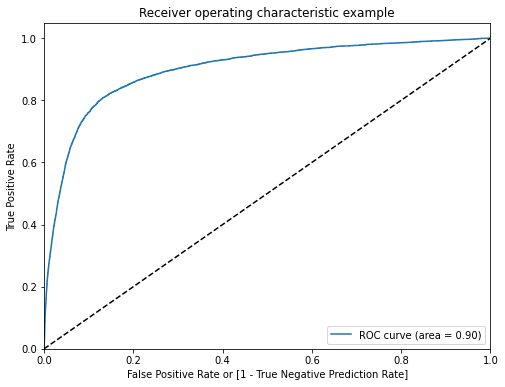

In [118]:
# Plotting the curve for the obtained metrics
draw_roc(y_train, y_train_pred)

### Optimal Cutoff Point

In [119]:
df_train_pred.head()

,id,churn,churn_prob,predicted
0,0,0,0.001868,0
1,1,0,0.116350,0
2,2,0,0.139876,0
3,3,0,0.057043,0
4,4,0,0.011429,0


In [120]:
df_train_pred['churn_prob'] = y_train_pred

In [121]:
df_train_pred.head()

,id,churn,churn_prob,predicted
0,0,0,0.003042,0
1,1,0,0.194024,0
2,2,0,0.248325,0
3,3,0,0.080973,0
4,4,0,0.056030,0


In [122]:
# Let's create columns with different probability cutoffs

thresholds = [float(x)/10 for x in range(10)]

for i in thresholds:
    df_train_pred[i]= df_train_pred.churn_prob.map(lambda x: 1 if x > i else 0)
df_train_pred.head()

,id,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.003042,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0.194024,0,1,1,0,0,0,0,0,0,0,0
2,2,0,0.248325,0,1,1,1,0,0,0,0,0,0,0
3,3,0,0.080973,0,1,0,0,0,0,0,0,0,0,0
4,4,0,0.056030,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])

for i in thresholds:
    confusion = confusion_matrix(df_train_pred.churn, df_train_pred[i])
    
    total = sum(sum(confusion))
    
    accuracy = ((confusion[0,0]+confusion[1,1]) / total )
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    
    cutoff_df.loc[i] =[ i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.101887     1.000000     0.000000
0.1          0.1  0.794068     0.866237     0.785881
0.2          0.2  0.883113     0.767386     0.896241
0.3          0.3  0.912599     0.629136     0.944756
0.4          0.4  0.918470     0.456534     0.970875
0.5          0.5  0.917327     0.325154     0.984507
0.6          0.6  0.914599     0.227846     0.992508
0.7          0.7  0.908284     0.127173     0.996898
0.8          0.8  0.900684     0.032389     0.999189
0.9          0.9  0.898799     0.008273     0.999825


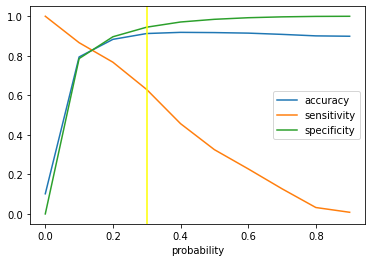

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x = 0.3, color = 'yellow')
plt.show()

In [125]:
df_train_pred['final_predicted'] = df_train_pred.churn_prob.map( lambda x: 1 if x > 0.3 else 0)
df_train_pred.head()

,id,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.003042,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0.194024,0,1,1,0,0,0,0,0,0,0,0,0
2,2,0,0.248325,0,1,1,1,0,0,0,0,0,0,0,0
3,3,0,0.080973,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0.056030,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
confusion = confusion_matrix(df_train_pred.churn, df_train_pred.final_predicted)
confusion

array([[59394,  3473],
       [ 2645,  4487]], dtype=int64)

In [127]:
# Let's check the overall accuracy.
accuracy_score(df_train_pred.churn, df_train_pred.final_predicted)

0.9125987514107344

In [128]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6291362871564778

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.94475639047513

In [131]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.055243609524869966


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5636934673366835


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9573655281355277


In [134]:
# Precision
print(TP/float(FP+TP))

0.5636934673366835


In [135]:
# Recall
print(TP/float(FN+TP))

0.6291362871564778


In [136]:
p, r, thresholds = precision_recall_curve(df_train_pred.churn, df_train_pred.final_predicted)

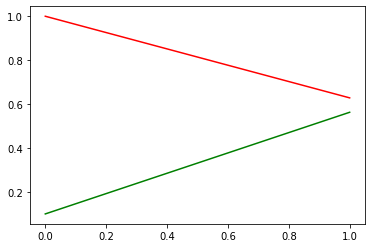

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing 

In [138]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.572249,-0.618112,-0.609266,-0.325664,-0.354281,-0.337172,-0.418189,-0.494286,-0.475163,-0.166712,...,-0.13149,-0.128351,-0.12571,-0.546497,-0.549824,-0.553085,0.494908,-0.252885,-0.246124,-0.233557
1,0.392068,0.689334,0.233032,-0.177484,-0.285791,-0.347894,0.905500,1.357198,0.655653,-0.166712,...,-0.13149,-0.128351,-0.12571,-0.546497,-0.549824,-0.553085,1.377923,-0.252885,-0.246124,-0.233557
2,0.139761,0.455036,1.328080,-0.407802,-0.394663,-0.385404,-0.556189,-0.451428,-0.443101,0.238724,...,-0.13149,-0.128351,-0.12571,-0.546497,-0.549824,-0.553085,-0.990782,1.698685,2.584851,0.706631
3,-0.716864,-0.310125,-0.723055,-0.415359,-0.413270,-0.412946,-0.482491,0.048430,-0.509140,-0.166712,...,-0.13149,-0.128351,-0.12571,-0.546497,-0.549824,-0.553085,0.024527,-0.252885,-0.246124,-0.233557
4,0.070972,0.371999,0.382102,1.094637,1.567866,1.884453,-0.415696,-0.520409,-0.351659,-0.166712,...,-0.13149,-0.128351,-0.12571,-0.546497,-0.549824,-0.553085,-0.796539,-0.252885,-0.246124,-0.233557


In [139]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

In [140]:
X_test_sm.shape

(30000, 29)

In [141]:
y_test_pred =  lr_model.predict(X_test_sm)

In [142]:
y_test_pred.head(10)

0    0.009655
1    0.008611
2    0.371838
3    0.000370
4    0.076652
5    0.614894
6    0.174705
7    0.035880
8    0.121019
9    0.266429
dtype: float64

In [143]:
df_test_pred = pd.DataFrame({'id': df_test['id']})

In [144]:
df_test_pred.head()

,id
0,69999
1,70000
2,70001
3,70002
4,70003


In [145]:
df_test_pred['churn_probability'] = y_test_pred.map(lambda x: 1 if x > 0.3 else 0)

In [146]:
df_test_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [147]:
df_test_pred.to_csv("Submission.csv", index=False)

This can be our base model. Though its not doing pretty good on sensitivity its better on the specificity. Anyway our primary goal is to predict the churn customers so lets go the high performing models.

### Random Forest

In [ ]:
 # rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# # Create the parameter grid based on the results of random search 
#  params = {
#      'max_depth': [5, 10, 15, 20],
#      'min_samples_leaf': [10, 20, 50],
#      'max_features': [10, 20, 30],
#      'n_estimators': [30, 60, 100]
#  }

In [ ]:
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=params, 
#                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
# %%time
# grid_search.fit(X_train ,y_train)

In [ ]:
 # rf_model = grid_search.best_estimator_

From the above grid search cv code, we have already got our best model. Our best model from the above code is 

RandomForestClassifier(max_depth=15, max_features=30, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [155]:
rf_model = RandomForestClassifier(max_depth=15, max_features=30, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=30, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

### Model Evaluation

In [156]:
y_train_pred = rf_model.predict(X_train)

In [157]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [158]:
auc_score = roc_auc_score(y_train, y_train_pred)
auc_score

0.8313179859240627

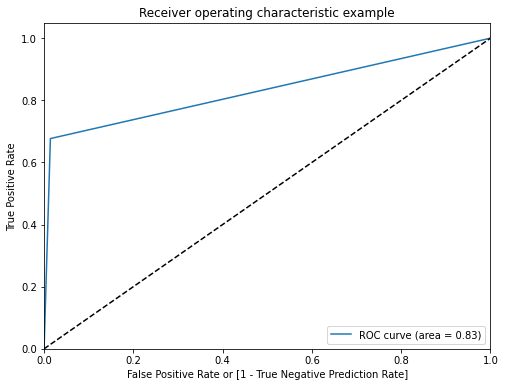

In [159]:
draw_roc(y_train, y_train_pred)

In [160]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[61976,   891],
       [ 2305,  4827]], dtype=int64)

In [161]:
# Let's check the overall accuracy.
accuracy_score(y_train, y_train_pred)

0.9543422048886413

In [162]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6768087492989344

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.9858272225491912

In [165]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01417277745080885


In [166]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8441762854144806


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9641418148441997


In [168]:
# Precision
print(TP/float(FP+TP))

0.8441762854144806


In [169]:
# Recall
print(TP/float(FN+TP))

0.6768087492989344


In [170]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

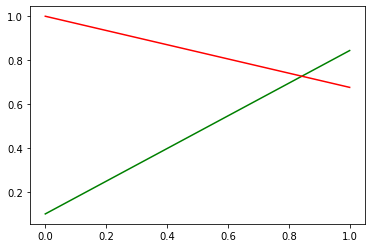

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
#plt.legend()
plt.show()

Compared with our base model its doing good. But still its not good enough in predicing the churn customers. That's may be because of the class imbalance. So lets create another random forest model with little adjustment on the class_weight parameter.

### Random Forest with balanced weight

In [292]:
rf_model = RandomForestClassifier(class_weight = 'balanced', max_depth=15, max_features=30, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=30,
                       min_samples_leaf=10, n_estimators=30, n_jobs=-1,
                       random_state=42)

### Model Evaluation

In [295]:
y_train_pred = rf_model.predict(X_train)

In [174]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [175]:
auc_score = roc_auc_score(y_train, y_train_pred)
auc_score

0.9452101745371148

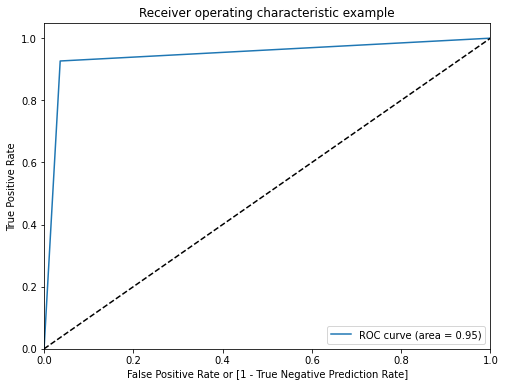

In [176]:
draw_roc(y_train, y_train_pred)

In [177]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[60597,  2270],
       [  524,  6608]], dtype=int64)

In [178]:
# Let's check the overall accuracy.
accuracy_score(y_train, y_train_pred)

0.9600851440734868

In [179]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9265283230510376

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.9638920260231918

In [182]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.036107973976808184


In [183]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7443117819328677


In [184]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9914268418383207


In [185]:
# Precision
print(TP/float(FP+TP))

0.7443117819328677


In [186]:
# Recall
print(TP/float(FN+TP))

0.9265283230510376


In [187]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

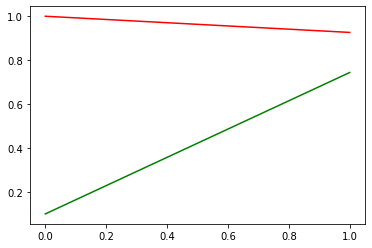

In [188]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing 

In [189]:
y_test_pred = rf_model.predict(X_test)

In [191]:
y_test_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [194]:
df_test_pred['churn_probability'] = y_test_pred

In [195]:
df_test_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [196]:
df_test_pred.to_csv("Submission.csv", index=False)

Like as we expected, Its quite better than the previous model. Lets also build logistic regression model with PCA.

### PCA

In [198]:
pca = PCA(random_state=42)

In [199]:
pca.fit(X_train)

PCA(random_state=42)

In [200]:
pca.components_

array([[ 1.36679993e-01,  1.45649925e-01,  1.38693960e-01, ...,
         1.14172227e-01,  1.16930202e-01,  1.10931873e-01],
       [ 1.11278308e-01,  1.19277059e-01,  1.10492955e-01, ...,
        -7.20541169e-02, -7.54762220e-02, -7.27101277e-02],
       [-4.30510074e-02, -6.01705655e-02, -5.31178482e-02, ...,
         1.66217953e-02,  1.73048861e-02,  1.86124592e-02],
       ...,
       [ 0.00000000e+00, -1.26681226e-15, -3.00250716e-16, ...,
        -2.47671939e-17,  1.18523302e-17,  6.56310593e-17],
       [-0.00000000e+00,  1.47930578e-17, -8.41649886e-17, ...,
         1.61138976e-17,  7.58203486e-18,  3.99262330e-17],
       [-0.00000000e+00, -5.47317454e-16,  6.37457871e-16, ...,
         1.83616497e-17, -2.49852360e-18, -3.51095267e-17]])

In [201]:
pca.explained_variance_ratio_

array([1.30054071e-01, 9.48331201e-02, 6.13315823e-02, 5.16964365e-02,
       3.68199485e-02, 2.99080159e-02, 2.67476303e-02, 2.40176630e-02,
       2.31632166e-02, 2.18891763e-02, 2.02331583e-02, 1.96382172e-02,
       1.82672132e-02, 1.80648532e-02, 1.63417891e-02, 1.56153697e-02,
       1.50434299e-02, 1.45310893e-02, 1.37538065e-02, 1.35541158e-02,
       1.19189990e-02, 1.13763876e-02, 1.10076246e-02, 1.06781536e-02,
       1.02251472e-02, 9.86443563e-03, 9.35245990e-03, 8.53153231e-03,
       8.45868704e-03, 7.93959568e-03, 7.62738893e-03, 7.51220270e-03,
       7.39244456e-03, 6.68739208e-03, 6.47236412e-03, 6.27375389e-03,
       6.17653949e-03, 6.00942117e-03, 5.97205733e-03, 5.84128329e-03,
       5.65112766e-03, 5.52024469e-03, 5.44839764e-03, 5.42230030e-03,
       5.29464388e-03, 4.84731266e-03, 4.67061940e-03, 4.63922253e-03,
       4.38765334e-03, 4.31054625e-03, 4.15302056e-03, 3.86922628e-03,
       3.81903690e-03, 3.71040465e-03, 3.65731031e-03, 3.33793886e-03,
      

In [202]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

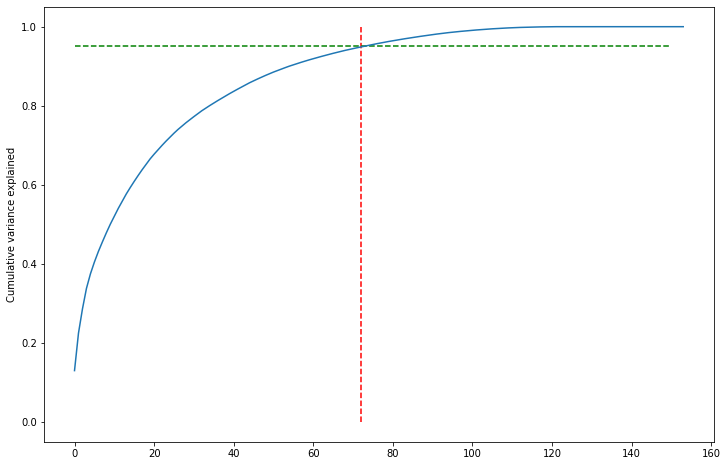

In [250]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=72, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

As we can see around 70-75 components can cover the 95% of the variance in the model so lets Perform PCA with 72 components

In [251]:
pca = IncrementalPCA(n_components=72)

In [252]:
df_train_pca = pca.fit_transform(X_train)

In [253]:
df_train_pca.shape

(69999, 72)

In [254]:
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(30000, 72)

### Logistic regression with PCA

In [255]:
lr_pca = LogisticRegression()

In [256]:
lr_model_pca = lr_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [257]:
y_train_pred = lr_model_pca.predict_proba(df_train_pca)

In [263]:
y_train_pred = y_train_pred[:,1]

In [264]:
"{:2.2}".format(roc_auc_score(y_train, y_train_pred))

'0.9'

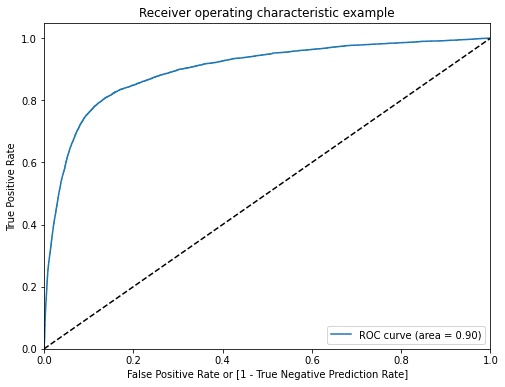

In [265]:
draw_roc(y_train, y_train_pred)

### Optimal Cutoff Point

In [267]:
df_train_pred.head()

,id,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.003042,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0.194024,0,1,1,0,0,0,0,0,0,0,0,0
2,2,0,0.248325,0,1,1,1,0,0,0,0,0,0,0,0
3,3,0,0.080973,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0.056030,0,1,0,0,0,0,0,0,0,0,0,0


In [268]:
df_train_pred_pca_lr = df_train_pred[['id', 'churn']]

In [269]:
df_train_pred_pca_lr.head()

,id,churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [270]:
df_train_pred_pca_lr['churn_prob'] = y_train_pred

In [273]:
df_train_pred_pca_lr.head()

,id,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.003471,1,0,0,0,0,0,0,0,0,0
1,1,0,0.296251,1,1,1,0,0,0,0,0,0,0
2,2,0,0.277331,1,1,1,0,0,0,0,0,0,0
3,3,0,0.095431,1,0,0,0,0,0,0,0,0,0
4,4,0,0.077640,1,0,0,0,0,0,0,0,0,0


In [272]:
# Let's create columns with different probability cutoffs

thresholds = [float(x)/10 for x in range(10)]

for i in thresholds:
    df_train_pred_pca_lr[i]= df_train_pred_pca_lr.churn_prob.map(lambda x: 1 if x > i else 0)
df_train_pred_pca_lr.head()

,id,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.003471,1,0,0,0,0,0,0,0,0,0
1,1,0,0.296251,1,1,1,0,0,0,0,0,0,0
2,2,0,0.277331,1,1,1,0,0,0,0,0,0,0
3,3,0,0.095431,1,0,0,0,0,0,0,0,0,0
4,4,0,0.077640,1,0,0,0,0,0,0,0,0,0


In [274]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])

for i in thresholds:
    confusion = confusion_matrix(df_train_pred_pca_lr.churn, df_train_pred_pca_lr[i])
    
    total = sum(sum(confusion))
    
    accuracy = ((confusion[0,0]+confusion[1,1]) / total )
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    
    cutoff_df.loc[i] =[ i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.101887     1.000000     0.000000
0.1          0.1  0.795826     0.855020     0.789110
0.2          0.2  0.886241     0.759675     0.900600
0.3          0.3  0.913470     0.625631     0.946124
0.4          0.4  0.919242     0.465788     0.970684
0.5          0.5  0.918156     0.333287     0.984507
0.6          0.6  0.914927     0.232614     0.992333
0.7          0.7  0.908399     0.131941     0.996485
0.8          0.8  0.900999     0.039821     0.998696
0.9          0.9  0.899013     0.011638     0.999682


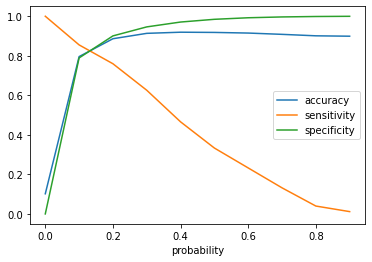

In [277]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
#plt.axvline(x = 0.3, color = 'yellow')
plt.show()

In [278]:
df_train_pred_pca_lr['final_predicted'] = df_train_pred_pca_lr.churn_prob.map( lambda x: 1 if x > 0.3 else 0)
df_train_pred_pca_lr.head()

,id,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.003471,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0.296251,1,1,1,0,0,0,0,0,0,0,0
2,2,0,0.277331,1,1,1,0,0,0,0,0,0,0,0
3,3,0,0.095431,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0.077640,1,0,0,0,0,0,0,0,0,0,0


In [279]:
y_train_pred = df_train_pred_pca_lr['final_predicted']

In [280]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[59480,  3387],
       [ 2670,  4462]], dtype=int64)

In [281]:
# Let's check the overall accuracy.
accuracy_score(y_train, y_train_pred)

0.9134701924313204

In [282]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [283]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6256309590577678

In [284]:
# Let us calculate specificity
TN / float(TN+FP)

0.9461243577711677

In [285]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.053875642228832295


In [286]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5684800611542872


In [287]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9570394207562349


In [288]:
# Precision
print(TP/float(FP+TP))

0.5684800611542872


In [289]:
# Recall
print(TP/float(FN+TP))

0.6256309590577678


In [290]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

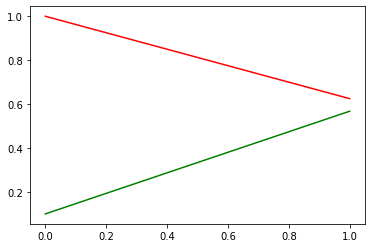

In [291]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
#plt.legend()
plt.show()

As we can see, there is no big difference PCA has made. Our base model and model build with PCA both are quite similar.

Its better we can try with some other ensemble model and see if that outperforms our best model.

### XG-Boost with hyper parameter tuning

In [364]:
# # A parameter grid for XGBoost
# params = {
#         'n_estimators' : [100, 200], # no of trees 
#         'learning_rate' : [0.01, 0.05, 0.1],  # eta
#         'min_child_weight': [5, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 10]
#         }

# folds = 5

# param_comb = 80

# random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [365]:
# random_search.fit(X_train, y_train)

In [366]:
# Fit the model to our train and target
# xgb.fit(X_train, y_train)  # default 

In [367]:
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)

`By doing the hyperparameter tuning we got the below best model. Lets test the model.`

Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy for 5-fold search with 80 parameter combinations:
0.9438706223913952

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}

In [362]:
xgb_model_hyp = xgb_classifier.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', scale_pos_weight = 3, subsample = 0.6,
                                             n_estimators = 200, min_child_weight = 10, max_depth = 10, 
                                             learning_rate = 0.05, gamma = 0.1, colsample_bytree = 0.6)

In [363]:
xgb_model_hyp.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [373]:
y_train_pred = xgb_model_hyp.predict(X_train)

In [374]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [375]:
auc_score = roc_auc_score(y_train, y_train_pred)
auc_score

0.95215044984399

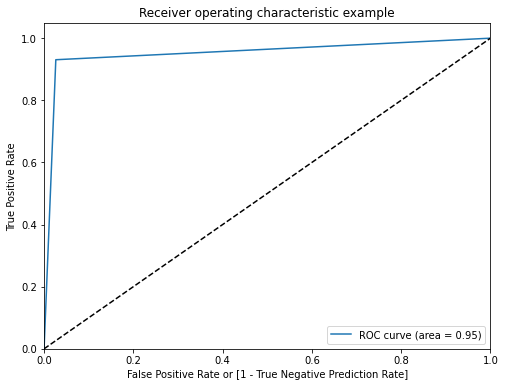

In [376]:
draw_roc(y_train, y_train_pred)

In [378]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[61214,  1653],
       [  495,  6637]], dtype=int64)

In [379]:
# Let's check the overall accuracy.
accuracy_score(y_train, y_train_pred)

0.9693138473406763

In [380]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [381]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9305945036455412

In [382]:
# Let us calculate specificity
TN / float(TN+FP)

0.9737063960424388

In [383]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0262936039575612


In [384]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8006031363088058


In [385]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9919784796383023


In [386]:
# Precision
print(TP/float(FP+TP))

0.8006031363088058


In [387]:
# Recall
print(TP/float(FN+TP))

0.9305945036455412


In [388]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

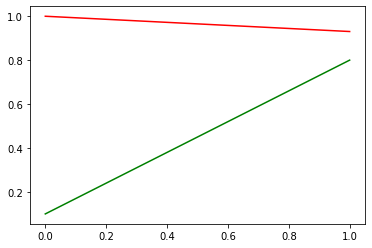

In [389]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Let's create an XG Boost base model and compare the accuracy .

No big difference in comparison with random forest. Lets build base model with XG boost without any hyperparameter tunning and see how much difference we get interms of accuracy when compared with tuned XG boost and base one. 

### XG Boost - Base model

In [437]:
xgb_model = xgb_classifier.XGBClassifier(n_jobs = -1,objective = 'binary:logistic', scale_pos_weight=3)
#xgb_model.get_params()

In [438]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Evaluation

In [439]:
y_train_pred = xgb_model.predict(X_train)

In [440]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [441]:
auc_score = roc_auc_score(y_train, y_train_pred)
auc_score

0.9641062710610184

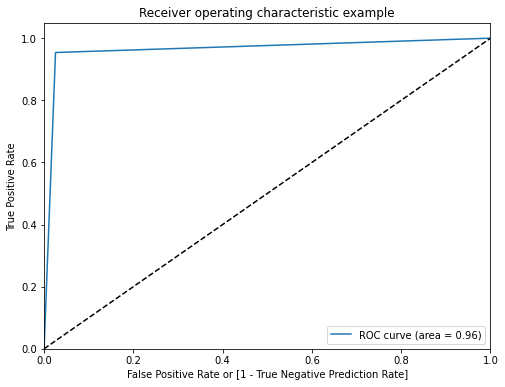

In [442]:
draw_roc(y_train, y_train_pred)

In [443]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[61254,  1613],
       [  329,  6803]], dtype=int64)

In [444]:
# Let's check the overall accuracy.
accuracy_score(y_train, y_train_pred)

0.9722567465249503

In [445]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [446]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9538698822209759

In [447]:
# Let us calculate specificity
TN / float(TN+FP)

0.974342659901061

In [448]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.02565734009893903


In [449]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8083412547528517


In [450]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9946576165500219


In [451]:
# Precision
print(TP/float(FP+TP))

0.8083412547528517


In [452]:
# Recall
print(TP/float(FN+TP))

0.9538698822209759


In [453]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

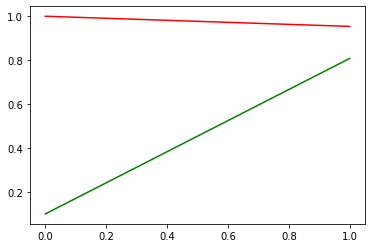

In [454]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing 

In [455]:
y_test_pred = xgb_model.predict(X_test)

In [456]:
y_test_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [457]:
df_test_pred['churn_probability'] = y_test_pred

In [458]:
df_test_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [459]:
df_test_pred.to_csv("Submission.csv", index=False)

Ohh! Its surprising. Our base model has outperformed the hyper parameter tuned XG boost model.

### SMOTE

Lets try smote to balance the imbalanced data and try to achieve more accuracy if possible.

In [464]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### XG Boost - Base model with SMOTE

In [519]:
xgb_model = xgb_classifier.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
#xgb_model.get_params()

In [520]:
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Evaluation

In [521]:
y_train_pred = xgb_model.predict(X_train_res)

In [522]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [523]:
auc_score = roc_auc_score(y_train_res, y_train_pred)
auc_score

0.9815563013981898

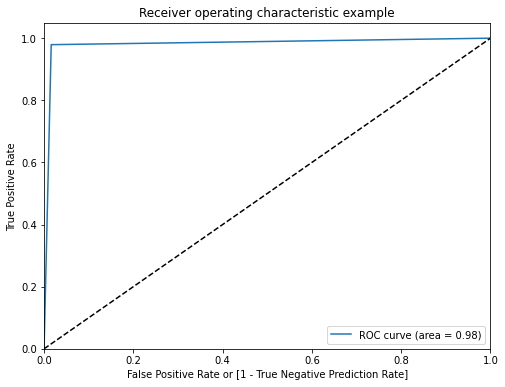

In [524]:
draw_roc(y_train_res, y_train_pred)

In [525]:
confusion = confusion_matrix(y_train_res, y_train_pred)
confusion

array([[61862,  1005],
       [ 1314, 61553]], dtype=int64)

In [526]:
# Let's check the overall accuracy.
accuracy_score(y_train_res, y_train_pred)

0.9815563013981898

In [527]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [528]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9790987322442617

In [529]:
# Let us calculate specificity
TN / float(TN+FP)

0.984013870552118

In [530]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.015986129447882035


In [531]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9839349084050002


In [532]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9792009623907814


In [533]:
# Precision
print(TP/float(FP+TP))

0.9839349084050002


In [534]:
# Recall
print(TP/float(FN+TP))

0.9790987322442617


In [535]:
p, r, thresholds = precision_recall_curve(y_train_res, y_train_pred)

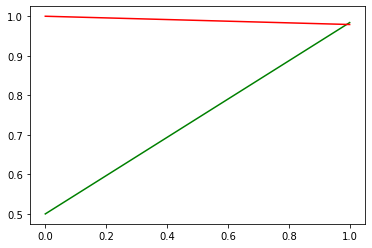

In [536]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing 

In [537]:
y_test_pred = xgb_model.predict(X_test)

In [538]:
y_test_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [539]:
df_test_pred['churn_probability'] = y_test_pred

In [540]:
df_test_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [541]:
df_test_pred.to_csv("Submission.csv", index=False)

Impressive. Now this model outperformed all our previous models and we have got accuracy quite high interms of both sensitivity and specificity.

### Feature Importance

In [564]:
feature_importance_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced', n_jobs=-1, max_depth=5, n_estimators=300, oob_score=True)

In [565]:
feature_importance_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=42)

In [567]:
feature_importance_rf.feature_importances_[:10]

array([0.00058979, 0.00121246, 0.0268796 , 0.00038617, 0.00134941,
       0.02133174, 0.00066266, 0.00175406, 0.02264352, 0.00012154])

In [574]:
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importance": np.around(classifier_rf.feature_importances_, 3)
})

In [576]:
imp_df.sort_values(by="Importance", ascending=False).head(10)

,Features,Importance
59,loc_ic_t2m_mou_8,0.115
80,total_ic_mou_8,0.093
65,loc_ic_mou_8,0.091
29,loc_og_mou_8,0.074
53,total_og_mou_8,0.066
56,loc_ic_t2t_mou_8,0.049
20,loc_og_t2m_mou_8,0.046
104,last_day_rch_amt_8,0.037
14,roam_og_mou_8,0.030
17,loc_og_t2t_mou_8,0.029


### The above are the top 10 important features and are ordered in terms of their importance. 

Our XG Boost model is a decent model. The accuracy of our model is 98%.

Sensitivity and Specificity both are at 98%. so we are able to predict 98% of the churn as well as non-churn customers. This is the kind of model that can surely add a value.

From our exploration we found that mostly new customers are getting churned as high as compared to the old customers. So its better to take the relevent steps to focus high on the new customers.